In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.regression.linear_model as smf

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.svm import SVR

from xgboost import XGBRegressor

In [2]:
# Reading and copying the train_data

train_data = pd.read_excel("Data_train.xlsx")
test_data = pd.read_excel("Test_set.xlsx")

df = train_data.copy()

# Basic EDA 

In [3]:
# Checking the first five records

df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
# Checking the last five records

df.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [5]:
# Checking the random five records

df.sample(5)

Airline Date_of_Journey    Source Destination  \
6172  Multiple carriers      27/03/2019     Delhi      Cochin   
2579          Air India      27/03/2019     Delhi      Cochin   
2357             IndiGo      21/06/2019  Banglore       Delhi   
8458        Jet Airways       9/06/2019     Delhi      Cochin   
4038        Jet Airways      12/06/2019   Kolkata    Banglore   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
6172        DEL → BOM → COK    10:20         18:50   8h 30m      1 stop   
2579  DEL → HYD → BOM → COK    13:05  07:40 28 Mar  18h 35m     2 stops   
2357              BLR → DEL    22:10  01:00 22 Jun   2h 50m    non-stop   
8458        DEL → BOM → COK    15:00  04:25 10 Jun  13h 25m      1 stop   
4038        CCU → BOM → BLR    20:00  04:40 13 Jun   8h 40m      1 stop   

                  Additional_Info  Price  
6172                      No info  11421  
2579                      No info   8875  
2357                      No info   3943  
8458  In-flight meal not included  10262  
4038                      No info  12576

In [6]:
# Checking the shape of the data

print(f"No. of rows : {df.shape[0]}\nNo. of features : {df.shape[1]}")

No. of rows : 10683
No. of features : 11


In [7]:
# Checking the features

df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# Checking the data types of the features

df.dtypes.sort_values()

Price               int64
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [9]:
# Checking the metadata of the dataset

df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.1 MB


In [10]:
# Checking the number of null entries in the dataset

print('\033[1m' + f"The total number of null values in the dataset : {df.isna().sum().sum()}\n" + '\033[0m')

if df.isna().sum().sum() != 0:
    null_features = [col for col in df.columns if df[col].isna().sum() != 0]
    null_df = pd.DataFrame({
        "Feature" : [col for col in null_features],
        "Null_Count" : [df[col].isna().sum() for col in null_features],
        "Null_Percentage" : [str(np.round((df[col].isna().sum() / len(df)) * 100, 2)) + "%" for col in null_features],
        "Data_Type" : [df[col].dtype for col in null_features]
    }).set_index("Feature").sort_values("Null_Count")

else:
    pass

null_df

The total number of null values in the dataset : 2



Null_Count Null_Percentage Data_Type
Feature                                          
Route                 1           0.01%    object
Total_Stops           1           0.01%    object

In [11]:
# Checking the statistical summary of the dataset

df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [12]:
# Checking the categorical summary of the dataset

df.describe(include = "O").T

count unique              top  freq
Airline          10683     12      Jet Airways  3849
Date_of_Journey  10683     44       18/05/2019   504
Source           10683      5            Delhi  4537
Destination      10683      6           Cochin  4537
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10683    222            18:55   233
Arrival_Time     10683   1343            19:00   423
Duration         10683    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10683     10          No info  8345

In [13]:
# Checking the correlation

df.corr()

Price
Price    1.0

In [14]:
# Checking for duplicate records

print('\033[1m' + f"The total number of duplicate records in the dataset : {df.duplicated().sum()}")

The total number of duplicate records in the dataset : 220


In [15]:
# Checking the unique values in each of the features

# for col in df.columns:
#     print('\n\033[1m' + f"The {col} features consists if {df[col].nunique()} unique values, which are follows : \n" + '\033[0m')
#     for i in df[col].unique():
#         print(f"{i}")

# Pre-Processing (I)

In [16]:
# Creating a function to perform data preprocessing

def pre_processing(data):
    
    # Transforming the data after EDA
    
    # Replacing the flight duration from 5 minutes to 4h 15min 
    data.iloc[6474, 7] = "4h 15m"
    # Replacing the flight duration from "47h 40m" to "33h 15m"
    data.iloc[10456, 7] = "33h 15m"
    # Replacing "New Delhi" to "Delhi" in the "Destination" feature
    data["Destination"].replace("New Delhi", "Delhi", inplace = True)
    # Replacing "No Info" with "No info" in the "Additional Info" feature
    data["Additional_Info"].replace("No Info", "No info", inplace = True)
    
    # Creating a new categorical feature "In-flight_Meal"
    data["In-flight_Meal"] = np.where(data["Additional_Info"].str.contains("meal"), 0, 1)
        
    # Creating a new feature named "Next_day_Arrival" to store flights that arrived on next day (overnight flight)
    data["Overnight_Flight"] = np.where(data["Arrival_Time"].str.split().str.len() != 1, 1, 0)
    
    # Stripping the date from the "Arrival_Time" feature
    data["Arrival_Time"] = data["Arrival_Time"].str.split(" ").str[0]
    
    # Preprocessing the "Duration" feature
    data["Duration"] = np.where(~data["Duration"].str.lower().str.contains("h"), "0h " + data["Duration"],
                                np.where(~data["Duration"].str.lower().str.contains("m"), data["Duration"] + " 0m", data["Duration"])) 
    
    # Converting the features "Date_of_Journey", "Dep_Time", "Arrival_Time" to datetime object  
    for col in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]:
        data[col] = pd.to_datetime(data[col])
    
    # Extracting the day, month and day_of_week from the 'Date_of_Journey' feature to create new features called 'Day' and 'Month'
    data["Day"], data["Month"], data["Day_of_Week"] = data["Date_of_Journey"].dt.day, data["Date_of_Journey"].dt.month, data["Date_of_Journey"].dt.dayofweek
    data["Day_of_Week"] += 1
    
    # Replacing "non-stop" with "0 stops" in the "Total_Stops" feature
    data["Total_Stops"].replace("non-stop", "0 stops", inplace = True)
    
    # Stripping "stop" / "stops" from the "Total_Stops" feature
    data["Total_Stops"] = data["Total_Stops"].str.split(" ").str[0]
    
    # Converting the "Total_Stops" feature to integer type
    data["Total_Stops"] = data["Total_Stops"].astype("int64", errors = "ignore")
    
    # Extracting "hours" and "minutes" from "Arrival_Time" and "Dep_Time" features, and storing them
    data["Arrival_Time_Hour"], data["Arrival_Time_Minute"] = data["Arrival_Time"].dt.hour, data["Arrival_Time"].dt.minute
    data["Dep_Time_Hour"], data["Dep_Time_Minute"] = data["Dep_Time"].dt.hour, data["Dep_Time"].dt.minute
    
    # Extracting hours and minutes from "Duration" features
    data["Duration_Hours"] = data["Duration"].str.split(" ").str[0].str[:-1].astype(int)
    data["Duration_Minutes"] = data["Duration"].str.split(" ").str[1].str[:-1].astype(int)
    
    # Calculation total duration a flight takes and storing it in "Total_Duration" feature
    data["Total_Duration"] = (data["Duration_Hours"] * 60) + (data["Duration_Minutes"] * 1)
    
    # Correcting the misspelled entry "Banglore" to "Bangalore" in both the "Source" and "Destination" features
    data["Source"].replace("Banglore", "Bangalore", inplace = True)
    data["Destination"].replace("Banglore", "Bangalore", inplace = True)
    
    # Dropping duplicate records
    data.drop_duplicates(inplace = True)
    
    # Dropping the missing data
    data.dropna(inplace = True)
    
    # Converting the "Total_Stops" feature to integer type
    data["Total_Stops"] = data["Total_Stops"].astype(int)
    
    # Dropping the features
    data.drop(columns = ["Date_of_Journey", "Arrival_Time", "Dep_Time", "Duration"], inplace = True)
    
pre_processing(df)

df.head()

Airline     Source Destination                  Route  Total_Stops  \
0       IndiGo  Bangalore       Delhi              BLR → DEL            0   
1    Air India    Kolkata   Bangalore  CCU → IXR → BBI → BLR            2   
2  Jet Airways      Delhi      Cochin  DEL → LKO → BOM → COK            2   
3       IndiGo    Kolkata   Bangalore        CCU → NAG → BLR            1   
4       IndiGo  Bangalore       Delhi        BLR → NAG → DEL            1   

  Additional_Info  Price  In-flight_Meal  Overnight_Flight  Day  Month  \
0         No info   3897               1                 1   24      3   
1         No info   7662               1                 0    5      1   
2         No info  13882               1                 1    6      9   
3         No info   6218               1                 0    5     12   
4         No info  13302               1                 0    3      1   

   Day_of_Week  Arrival_Time_Hour  Arrival_Time_Minute  Dep_Time_Hour  \
0            7                  1                   10             22   
1            6                 13                   15              5   
2            5                  4                   25              9   
3            4                 23                   30             18   
4            4                 21                   35             16   

   Dep_Time_Minute  Duration_Hours  Duration_Minutes  Total_Duration  
0               20               2                50             170  
1               50               7                25             445  
2               25              19                 0            1140  
3                5               5                25             325  
4               50               4                45             285

In [17]:
# Creating a copy of the pre-processed data

df_eda = df.copy()

# Creating a function to perform data preprocessing

def pre_processing_2(data):
    
    for col in ["Dep_Time_Hour", "Arrival_Time_Hour"]:
        
        data[col] = np.where(     
            ((data[col] > 4) & (data[col] <= 8)), "Early Morning",
            np.where(((data[col] > 8) & (data[col] <= 12)), "Morning",
                    np.where(((data[col] > 12) & (data[col] <= 16)), "Afternoon",
                            np.where(((data[col] > 16) & (data[col] <= 20)), "Evening",
                                    np.where(((data[col] > 20) & (data[col] <= 24)), "Night", "Late Night"))))       
        )
        
pre_processing_2(df_eda)

df_eda

Airline     Source Destination                  Route  Total_Stops  \
0           IndiGo  Bangalore       Delhi              BLR → DEL            0   
1        Air India    Kolkata   Bangalore  CCU → IXR → BBI → BLR            2   
2      Jet Airways      Delhi      Cochin  DEL → LKO → BOM → COK            2   
3           IndiGo    Kolkata   Bangalore        CCU → NAG → BLR            1   
4           IndiGo  Bangalore       Delhi        BLR → NAG → DEL            1   
...            ...        ...         ...                    ...          ...   
10678     Air Asia    Kolkata   Bangalore              CCU → BLR            0   
10679    Air India    Kolkata   Bangalore              CCU → BLR            0   
10680  Jet Airways  Bangalore       Delhi              BLR → DEL            0   
10681      Vistara  Bangalore       Delhi              BLR → DEL            0   
10682    Air India      Delhi      Cochin  DEL → GOI → BOM → COK            2   

      Additional_Info  Price  In-flight_Meal  Overnight_Flight  Day  Month  \
0             No info   3897               1                 1   24      3   
1             No info   7662               1                 0    5      1   
2             No info  13882               1                 1    6      9   
3             No info   6218               1                 0    5     12   
4             No info  13302               1                 0    3      1   
...               ...    ...             ...               ...  ...    ...   
10678         No info   4107               1                 0    4      9   
10679         No info   4145               1                 0   27      4   
10680         No info   7229               1                 0   27      4   
10681         No info  12648               1                 0    3      1   
10682         No info  11753               1                 0    5      9   

       Day_of_Week Arrival_Time_Hour  Arrival_Time_Minute  Dep_Time_Hour  \
0                7        Late Night                   10          Night   
1                6         Afternoon                   15  Early Morning   
2                5        Late Night                   25        Morning   
3                4             Night                   30        Evening   
4                4             Night                   35      Afternoon   
...            ...               ...                  ...            ...   
10678            3             Night                   25        Evening   
10679            6             Night                   20        Evening   
10680            6           Morning                   20  Early Morning   
10681            4         Afternoon                   10        Morning   
10682            4           Evening                   15        Morning   

       Dep_Time_Minute  Duration_Hours  Duration_Minutes  Total_Duration  
0                   20               2                50             170  
1                   50               7                25             445  
2                   25              19                 0            1140  
3                    5               5                25             325  
4                   50               4                45             285  
...                ...             ...               ...             ...  
10678               55               2                30             150  
10679               45               2                35             155  
10680               20               3                 0             180  
10681               30               2                40             160  
10682               55               8                20             500  

[10460 rows x 19 columns]

# Exploratory Data Analysis (EDA)

## Univairate Analysis (Numerical Features)

In [18]:
# Creating a function to perform Univariate Analysis on Numerical features

def univariate_eda_num(data, col):
    
    print('\033[1m' + f"\t\t\t\t\t\t\t{col}" + '\033[0m\n')

    # Checking the statistical summary of the feature
    print('\033[1m' + f"Statistical Summary" + '\033[0m\n')
    
    # Checking the skewness and outliers using IQR method
    skewness = np.round(data[col].skew(), 2)
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)
    outlier_count = len(data[col][(data[col] < lower_bound) | (data[col] > upper_bound)])
    stats_sum = np.round(data[col].describe(), 2)
    stats_sum["skewness"] = skewness
    stats_sum["outliers"] = outlier_count
    print(f"{pd.DataFrame(stats_sum)}\n")
    
    # Plotting graphs to check the distribution and presence of outliers
    fig, axes = plt.subplots(1, 2, figsize = (10, 4))
    sns.histplot(x = data[col], color = "darkblue", ax = axes[0], kde = True)
    sns.boxplot(x = data[col], color = "blue", ax = axes[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
    plt.tight_layout()

							Price

Statistical Summary

             Price
count     10460.00
mean       9027.36
std        4625.06
min        1759.00
25%        5224.00
50%        8266.00
75%       12346.25
max       79512.00
skewness      1.86
outliers     94.00



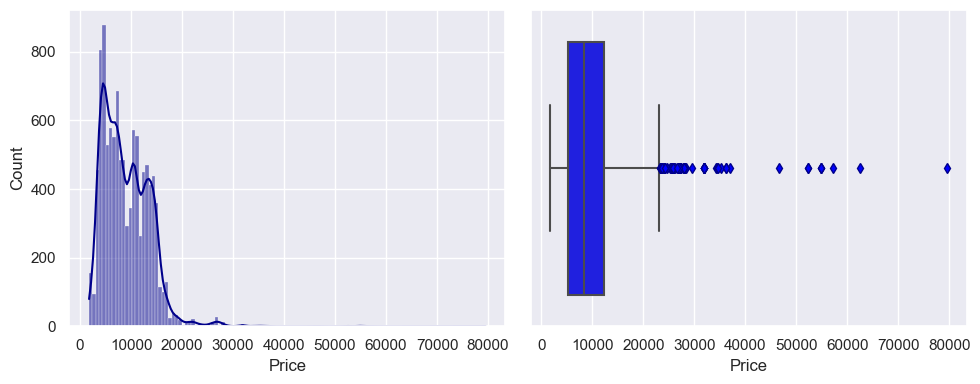

In [19]:
# Exploring the Price feature

univariate_eda_num(df_eda, "Price")

<b> Insights </b>

* There are four direct flights departing from Mumbai to Hyderabad with a <b>minimum flight fare</b> of <b>Rs. 1,759</b> in the dataset.
* There is a business class flight that departs from Bangalore, has a stopover in Bombay, and ultimately arrives in Delhi. This flight has a duration of 5 hours and 40 minutes and commands the <b>highest fare</b> of <b>Rs. 79,512</b>.
* The <b>average fare</b> is about <b>Rs. 9027.36</b>, and the <b>median fare</b> is <b>Rs. 8,266.00</b>.
* The <b>distribution</b> of the "Price" feature is <b>positively skewed</b>, with a <b>significant concentration of fares</b> found on the lower end, specifically <b>between Rs. 5,224.00 and Rs. 12,346.00</b>.
* There are outliers in the "Price" feature.

							Total_Duration

Statistical Summary

          Total_Duration
count           10460.00
mean              629.81
std               500.39
min                75.00
25%               170.00
50%               505.00
75%               910.00
max              2820.00
skewness            0.90
outliers           74.00



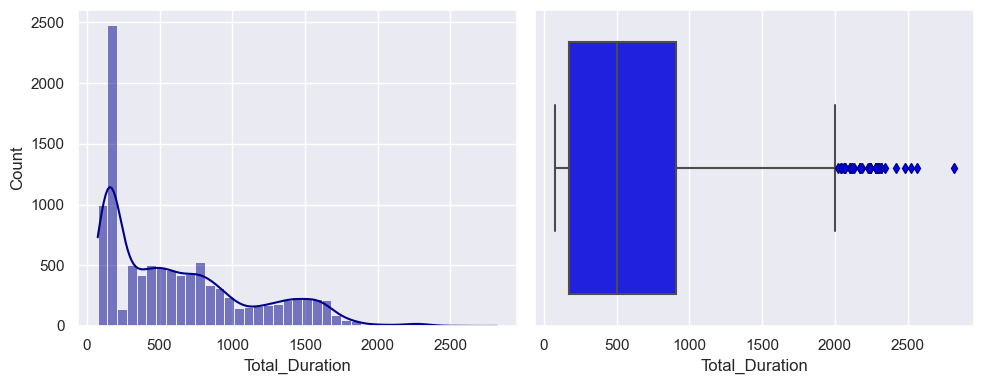

In [20]:
# Exploring the "Total_Duration" feature

univariate_eda_num(df_eda, "Total_Duration")

<b> Insights </b>

* The <b>minimum flight duration</b> is <b>75 minutes</b>, equivalent to <b>1 hour and 15 minutes</b>. These flights are evening flights departing from Mumbai to Hyderabad without any stops.
* The <b>longest flight</b> is <b>2,820 minutes</b>, which is equivalent to <b>47 hours</b>. This extensive duration is associated with a Jet Airways flight from Delhi to Cochin, which includes multiple stops during the journey.
* The <b>average flight duration</b> is approximately <b>629 minutes</b>, which is equivalent to <b>10 hours and 49 minutes</b>. The<b> median flight duration</b> is approximately <b>505 minutes</b>, equivalent to <b>8 hours and 41 minutes</b>.
* The <b>distribution</b> of the Total_Duration feature is <b>slightly positively skewed</b>, with a notable concentration of flight durations found at the lower end. This suggests that most of the flights had durations ranging from <b>170 minutes (equivalent to 2 hours and 50 minutes) to 910 minutes (equivalent to 15 hours and 17 minutes)</b>.
* There are outliers in the "Total_Duration" feature.

							Duration_Hours

Statistical Summary

          Duration_Hours
count           10460.00
mean               10.03
std                 8.37
min                 1.00
25%                 2.00
50%                 8.00
75%                15.00
max                47.00
skewness            0.89
outliers           66.00



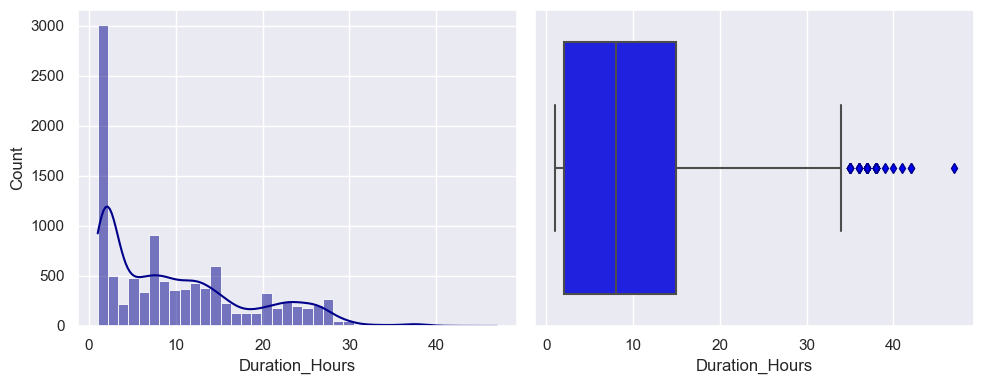

In [21]:
# Exploring the "Duration_Hours" feature

univariate_eda_num(df_eda, "Duration_Hours")

<b> Insights </b>

* The <b>shortest flight duration</b> is <b>1 hour</b>, departing from Mumbai and heading to Hyderabad.
* The <b>longest flight</b> from Delhi to Cochin with two stops, in Indore and Bombay, has a duration of <b>47 hours</b>.
* The <b>average flight duration</b> was about <b>10 hours</b>, and the <b>median flight duration</b> was <b>8 hours</b>.
* The <b>distribution</b> of the "Duration Hours" feature is <b>slightly positively skewed</b>, with the majority of observations found at the lower end. This indicates that most flights had a <b>duration</b> of <b>2 to 15 hours</b>.
* There are outliers in the "Duration_Hours" feature.

## Univariate Analysis (Categorical Features) 

In [22]:
# Creating a function to perform Univariate Analysis on the Categorical features

def univariate_cat_eda(data, col):
    
    # Plotting the distribution of categories
    plt.figure(figsize = (12, 6))
    sns.set(style = "white")
    sns.barplot(x = data[col].value_counts(ascending = False).index, y = data[col].value_counts(ascending = False).values, color = "darkblue")
    plt.title(f"{col} Distribution", color = "black", size = 15)
    plt.ylabel("Count", size = 15, color = "black")
    plt.xticks(rotation = 45, size = 11, color = "black")
    counts = data[col].value_counts(ascending = False)
    
    # Displaying the data above the bar
    for i in range(len(counts)):
        plt.text(x = i, y = counts[i] + 5, s = counts[i], ha = "center", va = "bottom", size = 12, color = "black")
    
    # plt.tight_layout()
    plt.show()
    

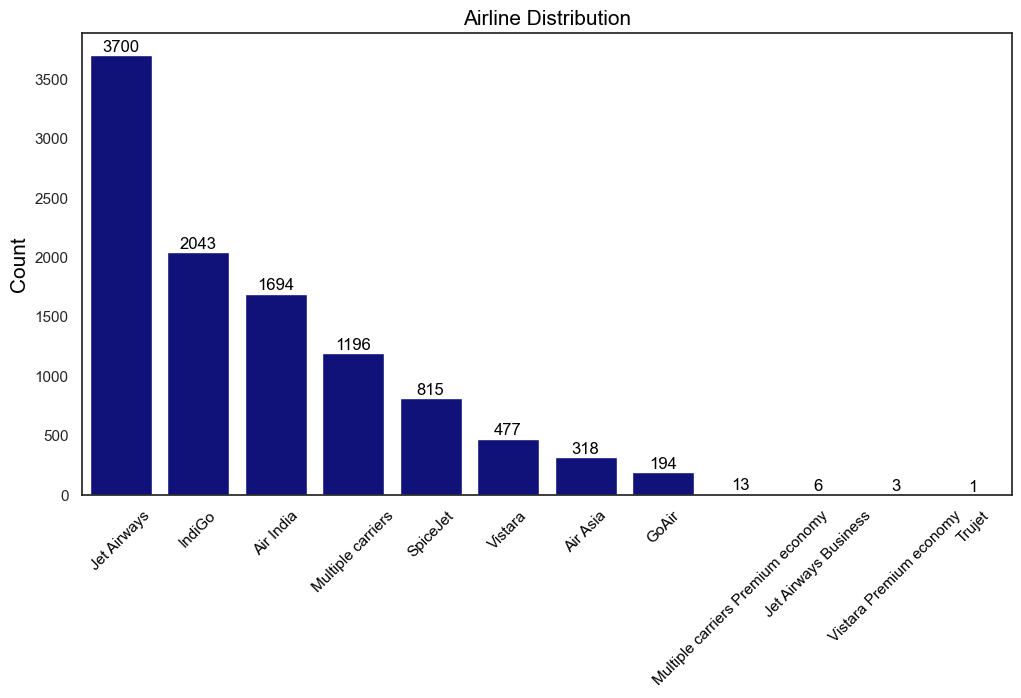

In [23]:
# Exploring the "Airline" feature

univariate_cat_eda(df_eda, "Airline")

<b> Insights </b>

* The <b>majority of flights</b> are operated by <b>Jet Airways Airline (3,700), followed by IndiGo Airlines (2,043) and Air India (1,694)</b>. This can be attributed to their <b>extensive route networks and larger fleets</b>.
* There are <b>very few flights</b> for <b>Jet Airways Business, Vistara Premium Economy, and Trujet</b>, each with counts of <b>less than 10</b>. This can be attributed to their <b>specialized nature</b>, <b>offering premium services</b>, <b>specific routes</b>, and <b>pricing</b> that play a significant role. These factors may limit their demand compared to economy class flights.

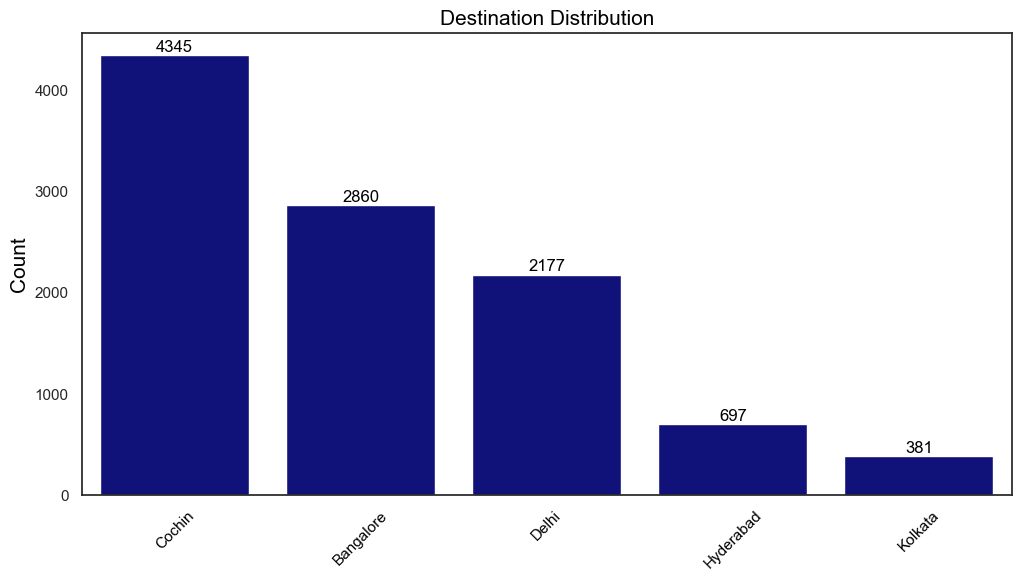

In [24]:
# Exploring the "Destination" feature

univariate_cat_eda(df_eda, "Destination")

<b> Insights </b>

* The <b>majority of passengers disembarked</b> in <b>Cochin (4,345)</b>, followed by <b>Bangalore (2,860)</b> and <b>Delhi (2,177)</b>. This can be attributed to their status as major <b>economic hubs, thriving business centers, and popular tourist destinations</b>. These cities host robust economic activities, with <b>Bangalore</b> serving as a <b>technology hub</b>, <b>Delhi</b> as the <b>national capital</b>, and <b>Cochin</b> attracting tourists with its <b>scenic beauty</b>.
* <b>Hyderabad (697)</b> and <b>Kolkata (381)</b> receive <b>fewer passengers</b> due to <b>differences in economic activity, international connectivity, and prominence in business and tourism</b> compared to other major Indian cities.

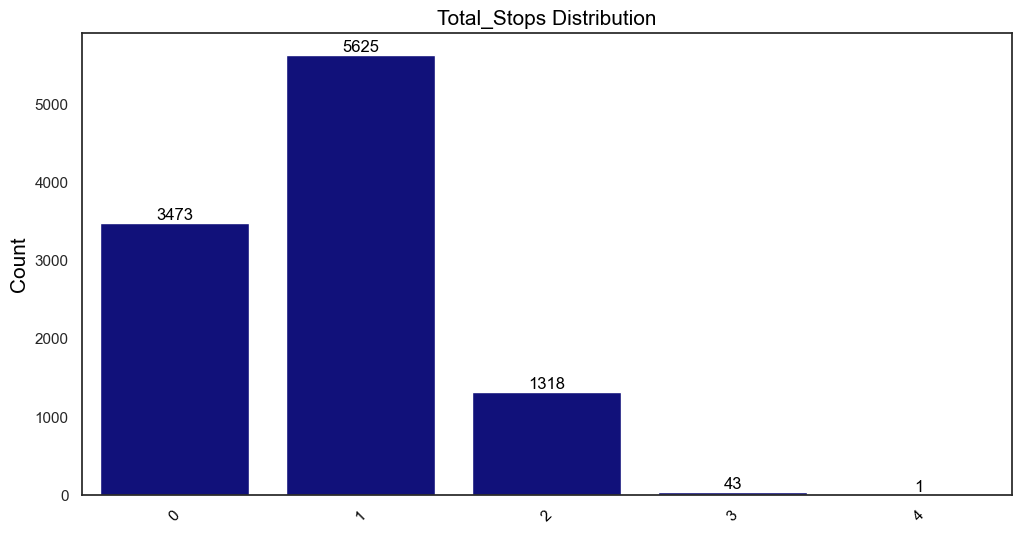

In [25]:
# Exploring the "Total_Stops" feature

univariate_cat_eda(df_eda, "Total_Stops")

<b> Insights </b>

* The <b>majority of passengers</b> featured in <b>one stop (5,625)</b>, providing themselves with <b>a single layover or connection to expand route options </b>. <b>Nonstop flights with no halts (3,473)</b> were preferred by passengers for <b>shorter routes, offering direct travel between departure and destination airports</b>. A smaller subset of flights <b>(1,318)</b> requires <b>two stops</b>, often used for <b>longer routes or specialized connections</b>.
* Multi-stop flights are infrequent, with <b>43 passengers</b> had <b>3 stops flights</b> and just <b>one passenger</b> with <b>4 stops</b>. These flights are usually designed for <b>unique itineraries, long-distance journeys, or passengers with specific travel needs.</b>

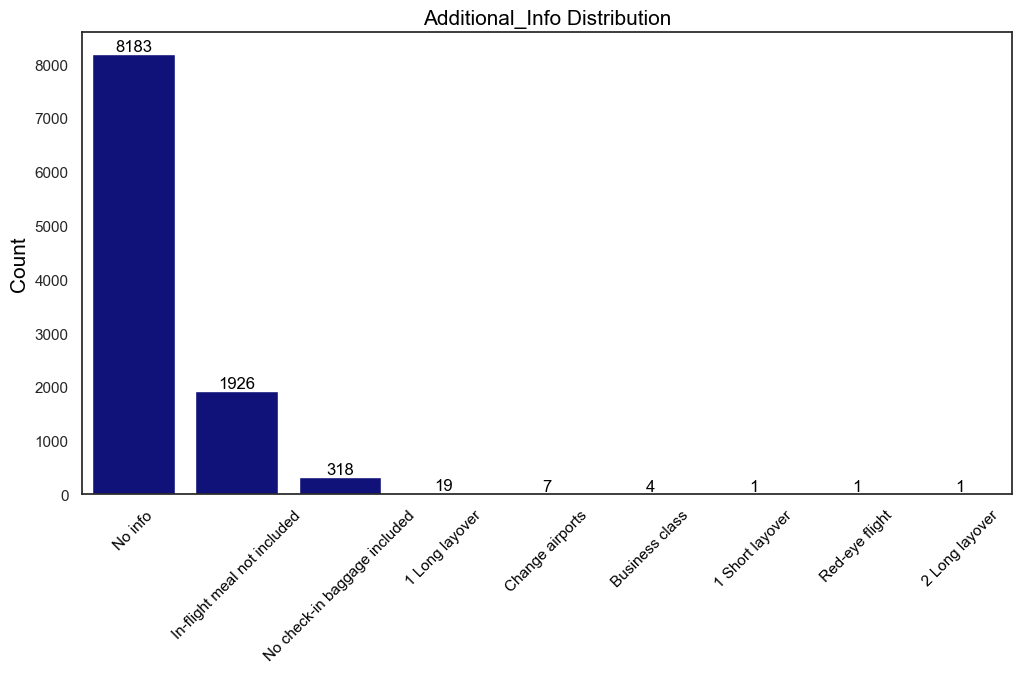

In [26]:
# Exploring the "Additional_Info" feature

univariate_cat_eda(df_eda, "Additional_Info")

<b> Insights </b>

* There are <b>8,183 passengers</b> with <b>no additional information / requirements</b>.
* <b>1,926 passengers do not have in-flight meals</b>, while <b>318</b> have <b>passengers with no check-in baggage</b>. These choices may result from <b>cost-conscious travelers</b> looking to <b>save on in-flight meal expenses or baggage fees</b>, as well as those who prefer the convenience of <b>traveling with hand luggage only</b>.
* Among the flights, there is <b>one flight</b> with a <b>1-short-layover</b>, denoting a <b>brief stopover</b>, and another categorized as a <b>1 Red-eye flight</b>, typically <b>operating overnight</b>. Additionally, <b>one flight</b> classified as <b>2-long-layover</b>, indicating <b>extended stopover times</b>, offering <b>diverse travel options</b> to accommodate different passenger needs and <b>scheduling preferences</b>.

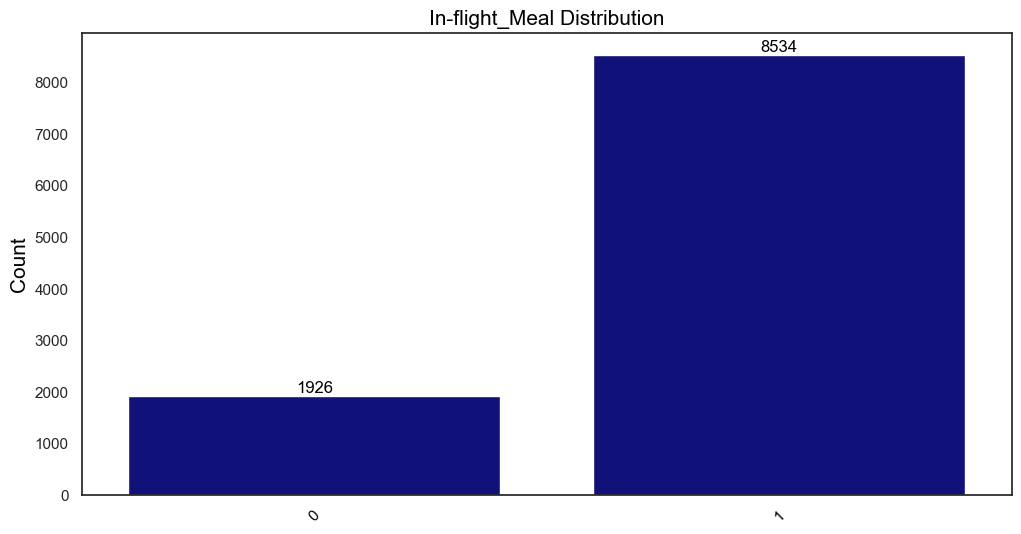

In [27]:
# Exploring the "In-flight_Meal" feature

univariate_cat_eda(df_eda, "In-flight_Meal")

<b> Insights </b>

* A total of <b>1,926 passengers opted not to have an in-flight meal</b>, while <b>8,534 passengers</b> chose to <b>enjoy a meal during their flight</b>.

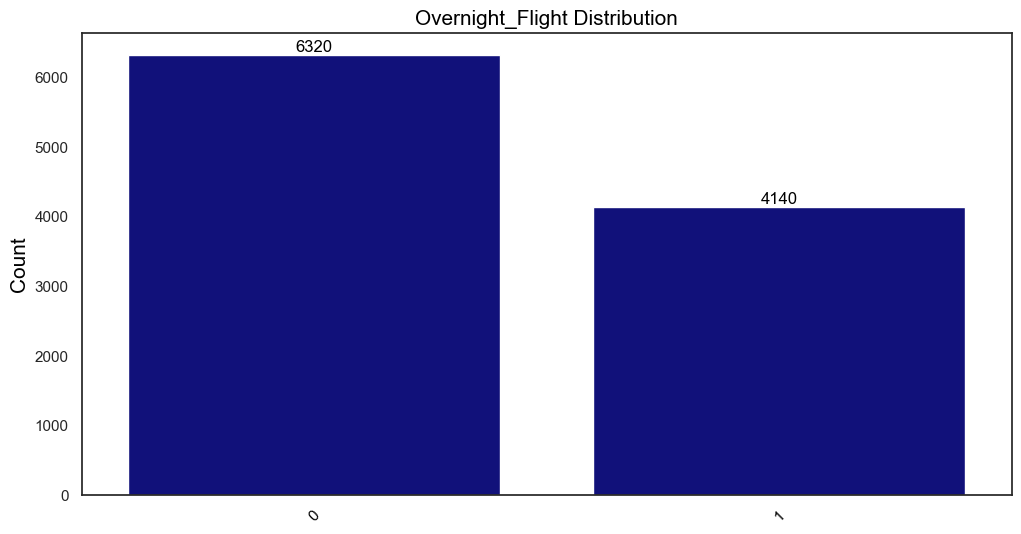

In [28]:
# Exploring the "Overnight_Flight" feature

univariate_cat_eda(df_eda, "Overnight_Flight")

<b> Insights </b>

* Among the passengers in the dataset, <b>4,140 traveled overnight</b>, likely on <b>red-eye flights</b> or during <b>nighttime hours</b>, while <b>6,320 did not experience overnight travel</b>, indicating <b>daytime or shorter duration flights</b>. 

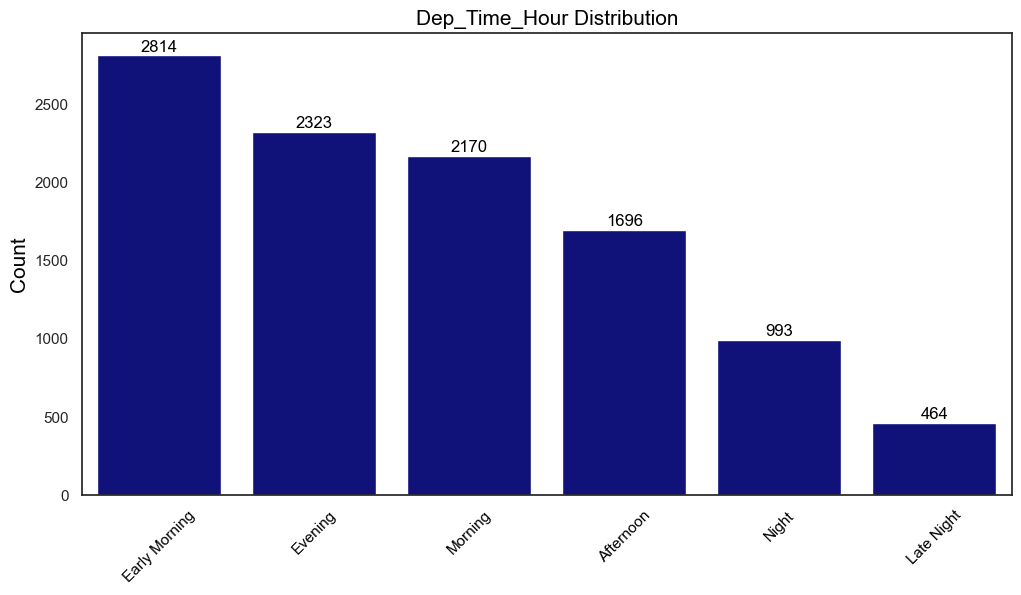

In [29]:
# Exploring the "Dep_Time_Hour" feature

univariate_cat_eda(df_eda, "Dep_Time_Hour")

<b> Insights </b>

* The <b>majority of passengers (2,814)</b> opted for <b>early morning flights</b>, typically departing between <b>4 am and 8 am </b>. Additionally, <b>2,323 passengers</b> chose <b>evening flights (between 4 pm and 8 pm)</b>, while <b>2,170 passengers </b>preferred <b>morning flights (between 8 am and 12 pm)</b>. 
* A <b>smaller number of passengers (464)</b> took <b>late-night flights</b>, departing between <b>12 am and 4 am</b>, while <b>993 passengers</b> opted for <b>nighttime flights</b>, typically scheduled between <b>8 pm and 12 am</b>.

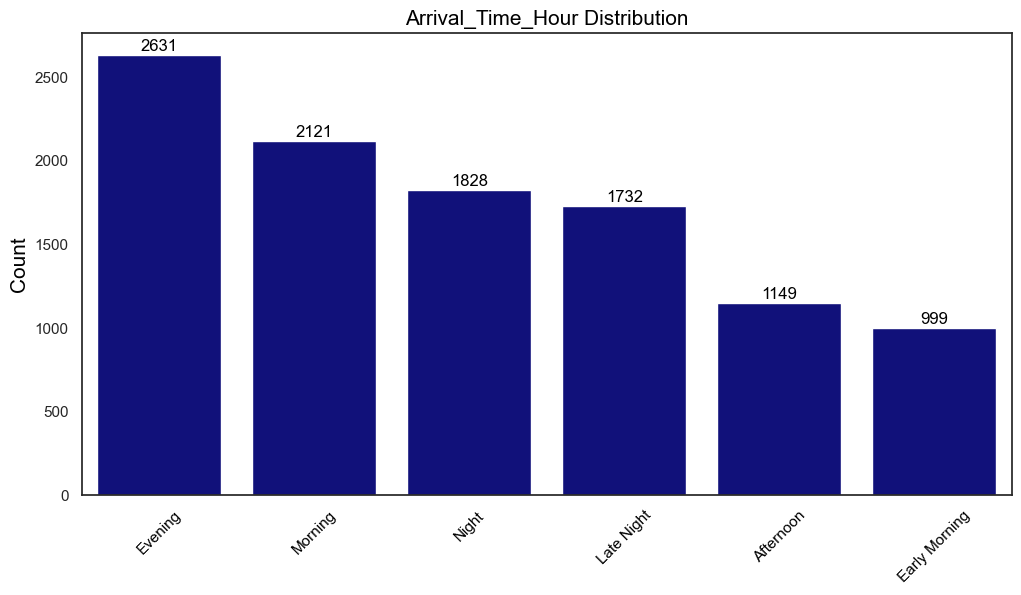

In [30]:
# Exploring the "Arrival_Time_Hour" feature

univariate_cat_eda(df_eda, "Arrival_Time_Hour")

<b> Insights </b>

* The <b>largest number of passengers (2,631)</b> arrived in the <b>evening</b>, typically between <b>4 pm and 8 pm</b>. Additionally, <b>2,121 passengers</b> arrived in the <b>morning</b>, between <b>8 am and 12 pm</b>, while <b>1,828 passengers</b> arrived at <b>night</b>, between <b>8 pm and 12 am</b>.
* There were <b>999 passengers</b> who arrived in the <b>early morning (4 am to 8 am)</b> and <b>1,149 passengers</b> who arrived in the <b>afternoon (12 pm to 4 pm)</b>.

## Bivariate Analysis (Categorical vs Numerical)

In [31]:
# Creating a function to perform Bivariate Analysis on Categorical vs Numerical features

def bivariate_cvn_eda(data, cat_col, num_col):
    
    plt.figure(figsize = (11, 6))
    sns.set(style = "white")
    
    # Plotting the Mean price distribution across different categories
    group = np.round(data.groupby(cat_col)[num_col].mean().sort_values(ascending = False), 2)
    sns.barplot(x = group.index, y = group.values, color = "darkblue")
    plt.title(f"Distribution of Avg. {num_col} across {cat_col}", color = "black", size = 15)
    plt.ylabel(f"Average {num_col}", size = 15, color = "black")
    plt.xticks(rotation = 75, size = 11, color = "black")
    
    # Displaying the data above the bar
    for i in range(len(group)):
        plt.text(x = i, y = group[i] + 5, s = group[i], ha = "center", va = "bottom", size = 12, color = "black")
    plt.show()

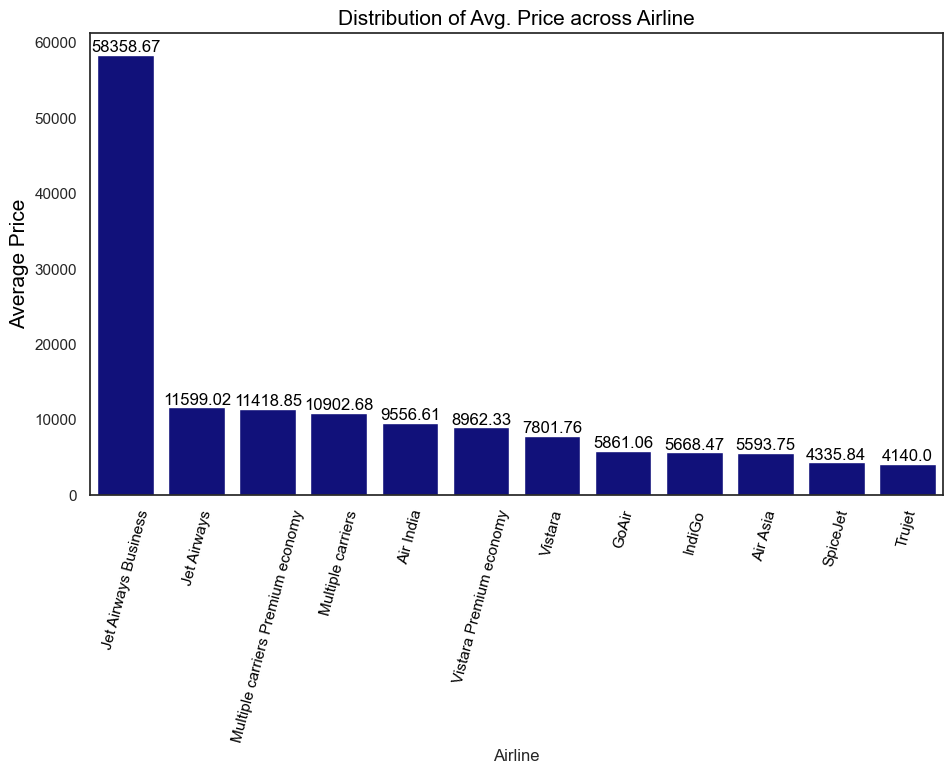

In [32]:
# Exploring the distribution of Avg. Price across Airline

bivariate_cvn_eda(df_eda, "Airline", "Price")

<b> Insights </b>

* The <b>higher mean price</b> of <b>Jet Airways Business class flights (Rs. 58,358)</b> compared to other airlines can be attributed to the <b>premium services and limited seating capacity</b> associated with business class offering <b>enhanced comfort, better in-flight amenities, and personalized service</b>, all of which contribute to the higher fare. In contrast, <b>Jet Airways (Rs. 11,599)</b> likely offers more <b>budget-friendly fares</b> in its <b>economy class</b>, attracting <b>cost-conscious travelers</b>. </b>Multiple carriers Premium Economy (Rs. 11,418)</b> strikes a <b>balance by offering a more comfortable experience than economy class at a relatively lower price point than business class</b>, making it an attractive option for travelers seeking added <b>comfort without the premium price tag</b>.
* Several passengers traveled on <b>Trujet airline</b> with a <b>fare</b> of <b>Rs. 4,140</b>, followed by <b>SpiceJet</b> at <b>Rs. 4,335</b>, and finally, <b>Air Asia</b> at <b>Rs. 5,593</b>.

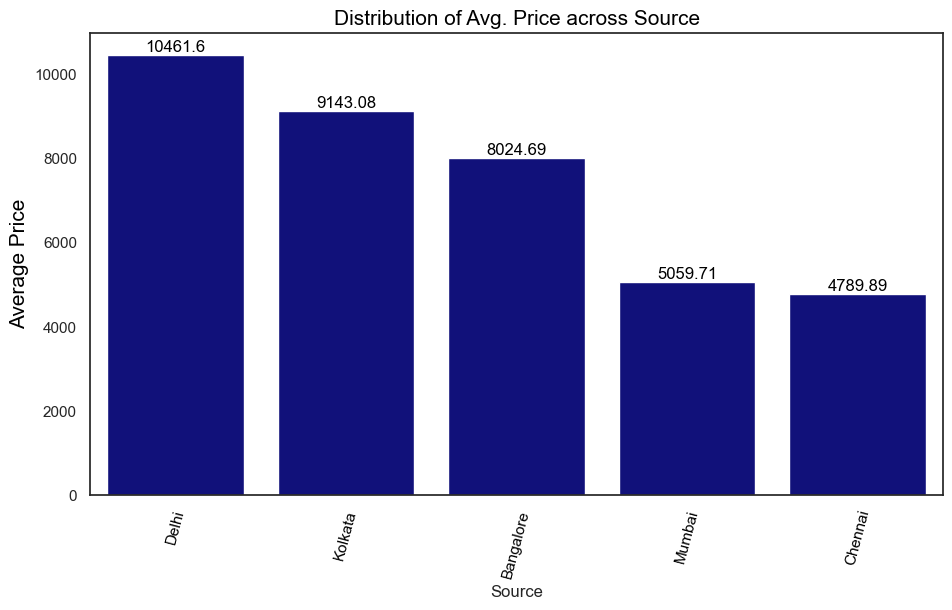

In [33]:
# Exploring the distribution of Avg. Price across Source

bivariate_cvn_eda(df_eda, "Source", "Price")

<b> Insights </b>

* The <b>highest average flight price</b> for flights <b>departing</b> from <b>Delhi (Rs. 10,461)</b> reflects the <b>city's status as a major aviation hub and its economic significance</b>. <b>Kolkata</b> follows with an <b>average fare</b> of <b>Rs. 9,143</b>, likely influenced by its <b>regional importance and passenger demand</b>. Flights from <b>Bangalore</b> have an <b>average cost</b> of <b>Rs. 8,024</b>, reflecting the <b>city's position as a major tech and business center</b>.
* The <b>flights</b> <b>boarded</b> from <b>Mumbai</b> have an <b>average fare</b> of <b>Rs. 5,059</b>, while those from <b>Chennai</b> have an <b>average fare</b> of <b>Rs. 4,789</b>.

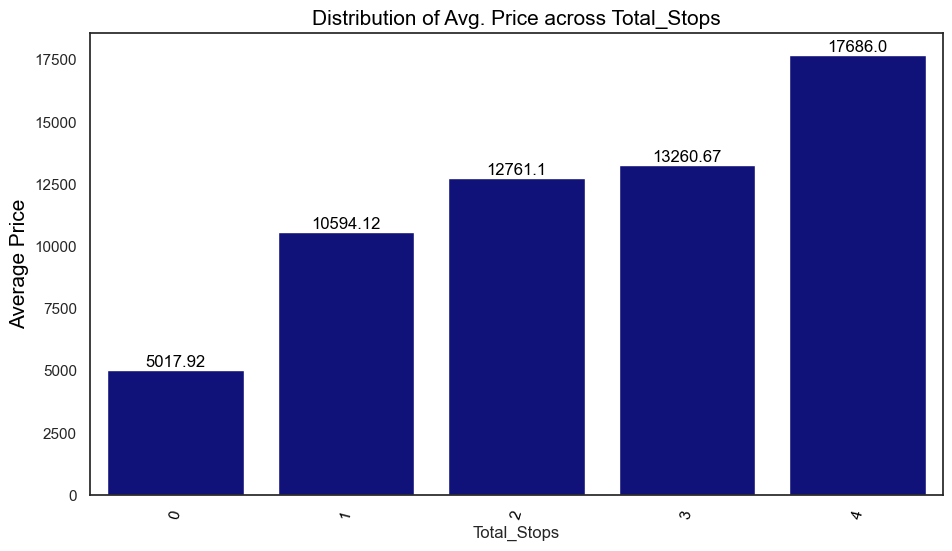

In [34]:
# Exploring the distribution Avg. Price across Destination

bivariate_cvn_eda(df_eda, "Total_Stops", "Price")

<b> Insights </b>

* As the <b>number of stops increases</b>, the <b>fare increases</b>.

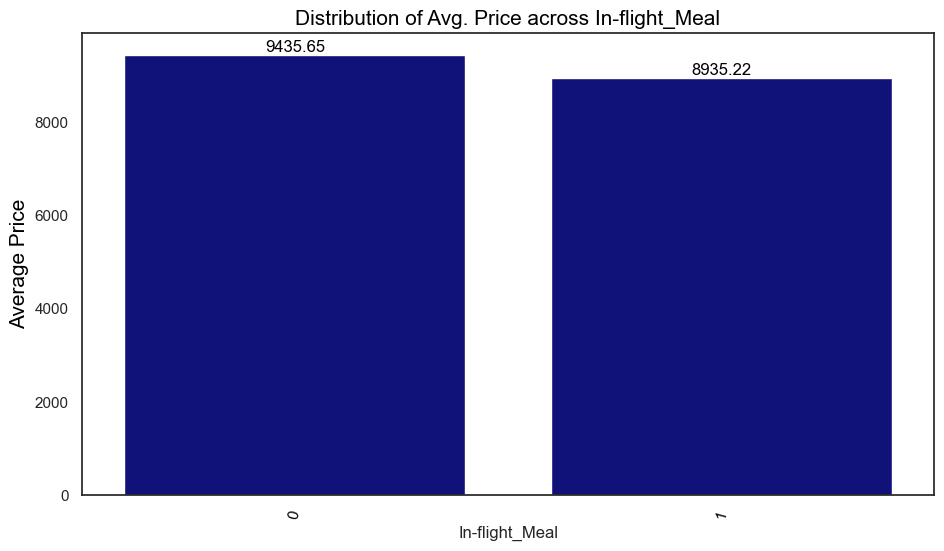

In [35]:
# Exploring the distribution of Avg. Price across In-flight_Meal

bivariate_cvn_eda(df_eda, "In-flight_Meal", "Price")

<b> Insights </b>

* The <b>flights</b> with a <b>high average price (Rs. 9,435)</b> are those where <b>passengers did not opt</b> for <b>In-flight meals</b>. In contrast, <b>flights offering meals</b> have <b>fewer passengers</b> who opted for in-flight meals.

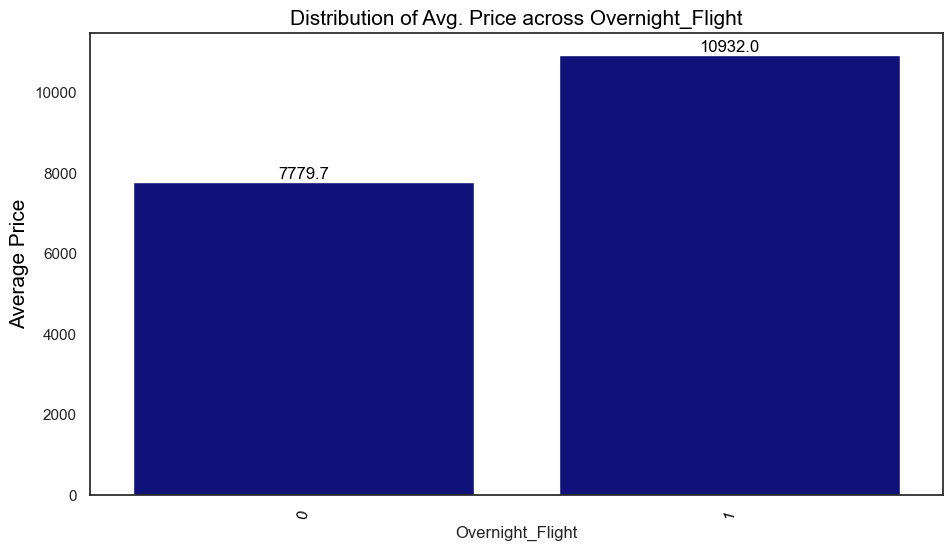

In [36]:
# Exploring the distribution of Avg. Price across "Overnight_Flight"

bivariate_cvn_eda(df_eda, "Overnight_Flight", "Price")

<b> Insights </b>

* <b>Overnight flights</b>, priced at an <b>average</b> of <b>Rs. 10,932</b>, tend to command a <b>higher cost</b> compared to <b>daytime flights (averaging Rs. 7,779)</b>. This <b>higher price</b> reflects the convenience of <b>traveling during nighttime hours</b>, which appeals to passengers <b>valuing time savings</b> and the ability to <b>arrive at their destination in the morning</b>. Additionally, <b>overnight flights</b> often incur <b>increased expenses</b> related to <b>crew accommodations, catering, and premium services</b>, contributing to their elevated pricing.

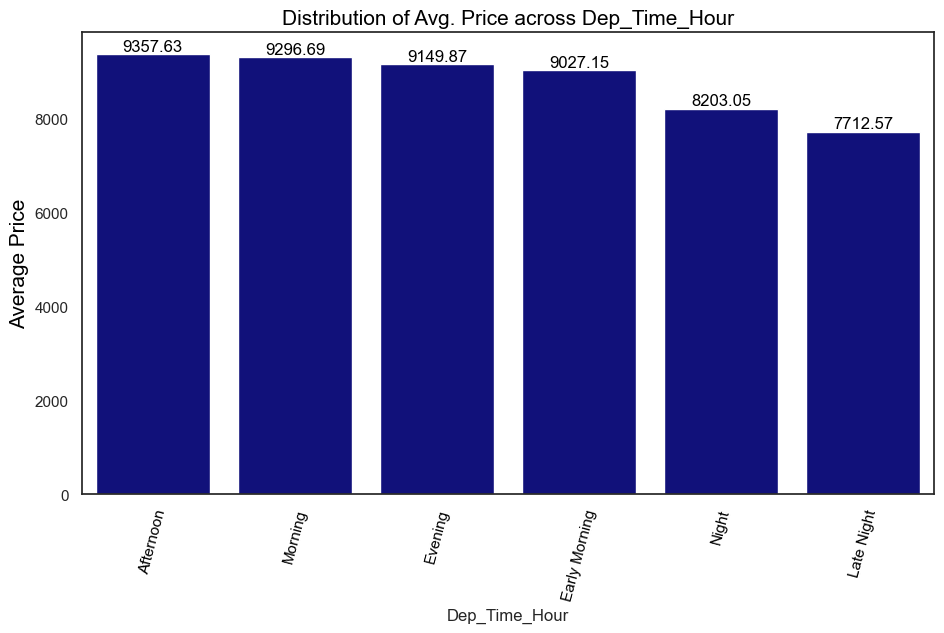

In [37]:
# Exploring the distribution of Avg. Price across "Dept_Time_Hour"

bivariate_cvn_eda(df_eda, "Dep_Time_Hour", "Price")

<b> Insights </b>

* <b>Flights</b> during <b>daytime hours (afternoon, morning, and evening)</b> often come with <b>higher fares</b> compared to night and late-night flights. This pricing difference is driven by the <b>convenience of daytime travel</b> and the <b>preferences of business travelers</b> who prioritize <b>schedule alignment</b>, while <b>night flights</b> tend to be <b>more affordable</b> due to their <b>less convenient travel times</b>.

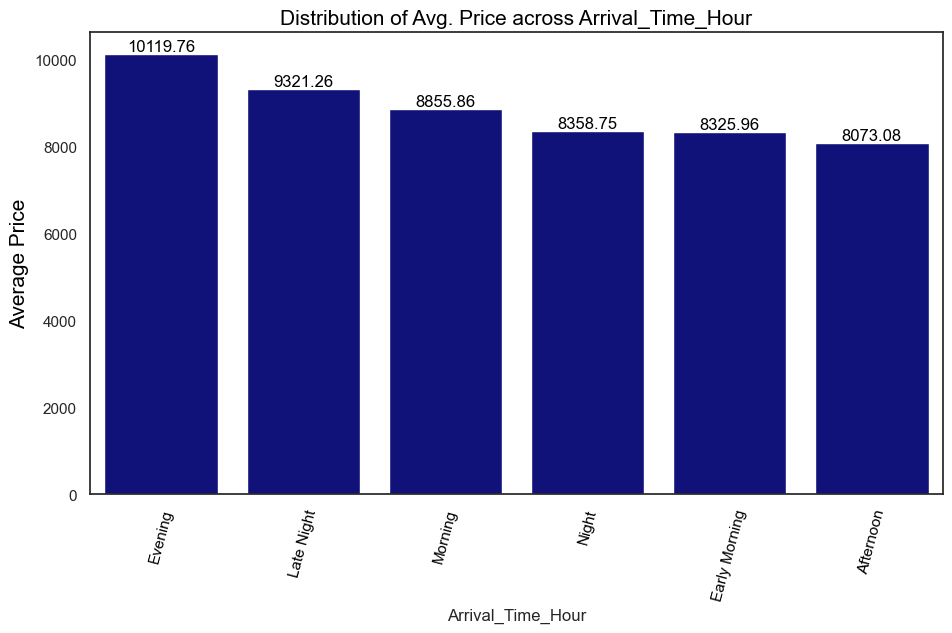

In [38]:
# Exploring the distribution of Avg. Price across "Arrival_Time_Hour"

bivariate_cvn_eda(df_eda, "Arrival_Time_Hour", "Price")

<b> Insights </b>

* <b>Evening flights</b> are the <b>most expensive</b> at <b>Rs. 10,119</b>, followed by <b>late-night flights</b> at <b>Rs. 9,321 </b>, and <b>morning flights</b> at <b>Rs. 8,855</b>. In contrast, <b>bafternoon flights</b> are the <b>least expensive</b> at <b>Rs. 8,073</b>, with <b>early morning flights</b> priced slightly higher at <b>Rs. 8,325</b>.

## Bivariate Analysis (Categorical vs Categorical) 

In [39]:
# Creating a function to perform Bivariate Analysis on Categorical vs Categorical features

def bivariate_cvc_eda(data, col1, col2):
    
    # Performing cross-tabulation on two categorical features
    cross_tab = pd.crosstab(data[col1], data[col2])
    print(f"{cross_tab}\n")
    
    # Plotting graphs to the distribution of categories
    plt.figure(figsize = (10, 6))
    sns.set()
    pd.crosstab(data[col1], df_eda[col2]).plot(kind = "bar", stacked = True, cmap = "plasma", width = 0.7)
    plt.show()
    sns.heatmap(cross_tab, annot = True, cmap = "Blues", fmt = ".0f")
    plt.show()

Source                             Bangalore  Chennai  Delhi  Kolkata  Mumbai
Airline                                                                      
Air Asia                                  88        0     80      150       0
Air India                                329       25    703      501     136
GoAir                                     93        0     76       25       0
IndiGo                                   513      184    705      445     196
Jet Airways                              787        0   1438     1256     219
Jet Airways Business                       4        0      2        0       0
Multiple carriers                          0        0   1196        0       0
Multiple carriers Premium economy          0        0     13        0       0
SpiceJet                                 178      128     87      300     122
Trujet                                     0        0      0        0       1
Vistara                                  183       43     45    

<Figure size 1000x600 with 0 Axes>

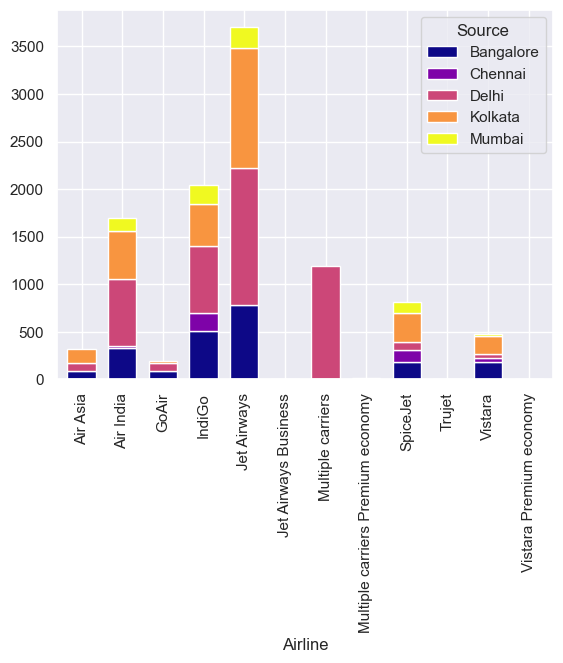

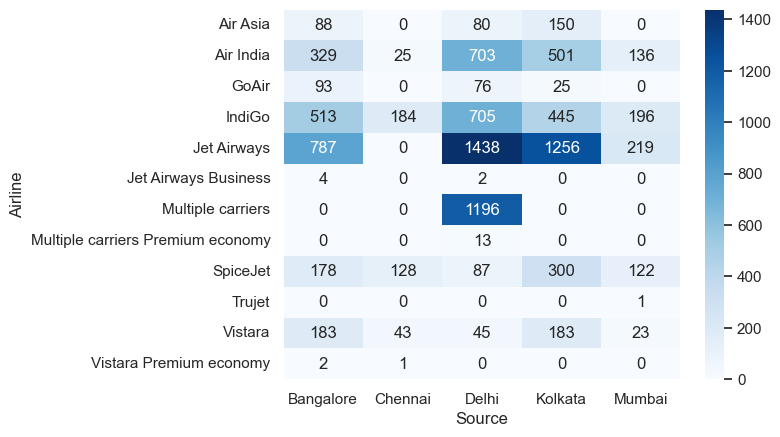

In [40]:
# Exploring the distribution between "Airline" and "Source"

bivariate_cvc_eda(df_eda, "Airline", "Source")

<b> Insights </b>

* <b>Jet Airways</b> has a significant <b>presence</b> in all the cities <b>expect for Chennai</b>, especially in <b>Delhi (1,438 passenegers)</b> and <b>Kolkata (1,256 passengers)</b>.
* <b>Flights</b> operated by <b>Multiple carriers</b> board <b>exclusively from Chennai</b>.
* <b>Flights</b> from <b>Vistara, SpiceJet, AirIndia and Indigo Airline</b> have <b>departed from all the cities</b>. 

Destination                        Bangalore  Cochin  Delhi  Hyderabad  \
Airline                                                                  
Air Asia                                 150      80     88          0   
Air India                                501     703    329        136   
GoAir                                     25      76     93          0   
IndiGo                                   445     705    513        196   
Jet Airways                             1256    1438    787        219   
Jet Airways Business                       0       2      4          0   
Multiple carriers                          0    1196      0          0   
Multiple carriers Premium economy          0      13      0          0   
SpiceJet                                 300      87    178        122   
Trujet                                     0       0      0          1   
Vistara                                  183      45    183         23   
Vistara Premium economy               

<Figure size 1000x600 with 0 Axes>

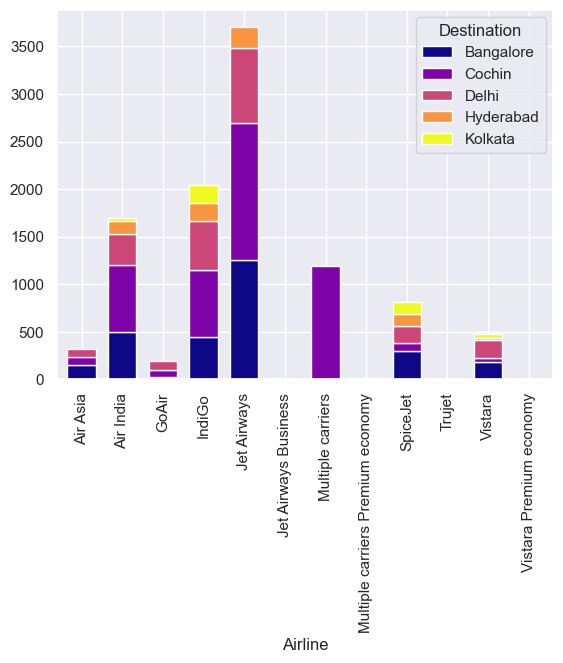

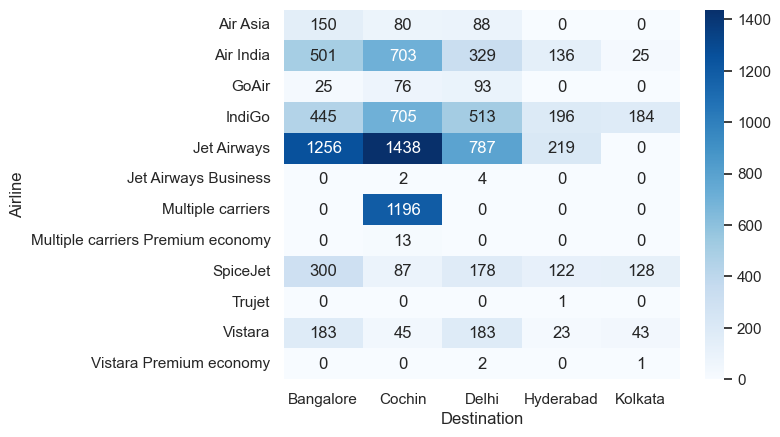

In [41]:
# Exploring the distribution between "Airline" and "Destination"

bivariate_cvc_eda(df_eda, "Airline", "Destination")

<b> Insights </b>

* <b>Flights</b> operated by <b>Multiple Carriers arrive exclusively at Cochin</b>, and these flights are <b>solely for travelling from Chennai to Cochin</b>.
* <b>Jet Airways Airlines flies</b> to <b>every city expect Chennai</b>.
* <b>Air India, IndiGo, Spice and Vistara Airline</b> provide <b>passenger service</b> to <b>every City</b>. 

Total_Stops                           0     1    2   3  4
Airline                                                  
Air Asia                            180   129    9   0  0
Air India                           416   540  702  35  1
GoAir                                92   102    0   0  0
IndiGo                             1231   793   19   0  0
Jet Airways                         622  2535  543   0  0
Jet Airways Business                  0     4    2   0  0
Multiple carriers                     0  1145   43   8  0
Multiple carriers Premium economy     0    13    0   0  0
SpiceJet                            667   148    0   0  0
Trujet                                0     1    0   0  0
Vistara                             262   215    0   0  0
Vistara Premium economy               3     0    0   0  0



<Figure size 1000x600 with 0 Axes>

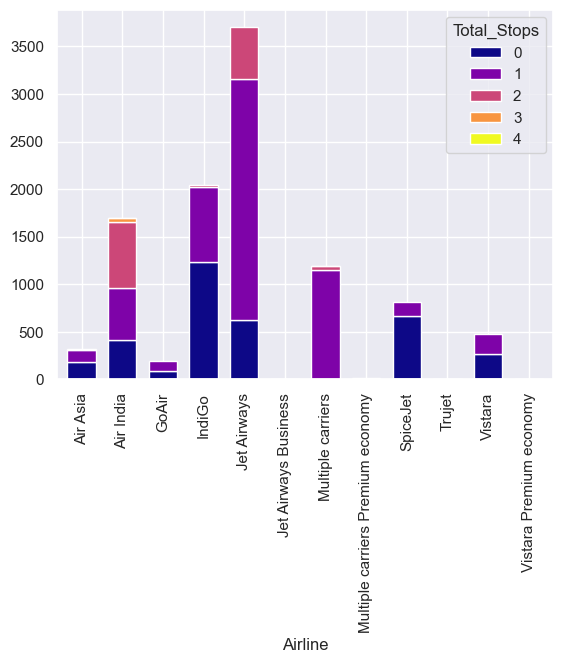

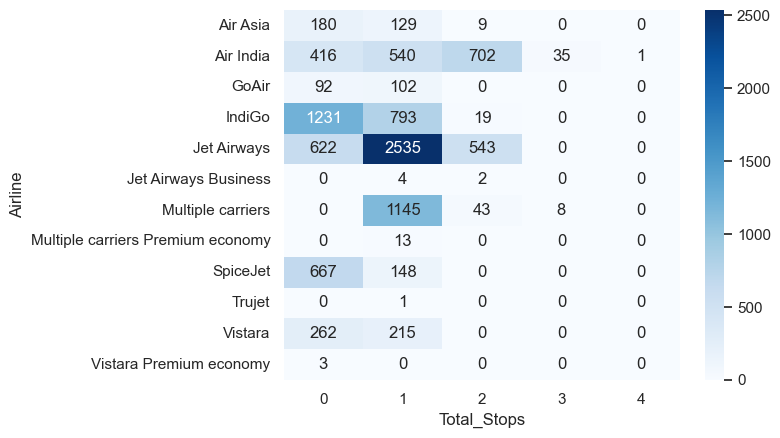

In [42]:
# Exploring the distribution between "Airline" and "Total_Stops"

bivariate_cvc_eda(df_eda, "Airline", "Total_Stops")

<b> Insights </b>

* <b>Jet Airway Airlines</b> often includes <b>multiple stops</b> in its flights, particularly <b>one-stop layovers</b>.
* <b>IndiGo Airlines</b> offer <b>non-stop flights (i.e with no layover)</b>.
* <b>A solitary passenger</b> flew from <b>Bangalore to Delhi</b> in <b>Air India Airlines</b>, included <b>four stopovers</b>.
* <b>Airline</b> that offers <b>flights</b> with <b>two or more stops</b> are <b>limited</b>.

In-flight_Meal                        0     1
Airline                                      
Air Asia                              0   318
Air India                             0  1694
GoAir                                 0   194
IndiGo                                0  2043
Jet Airways                        1830  1870
Jet Airways Business                  0     6
Multiple carriers                    96  1100
Multiple carriers Premium economy     0    13
SpiceJet                              0   815
Trujet                                0     1
Vistara                               0   477
Vistara Premium economy               0     3



<Figure size 1000x600 with 0 Axes>

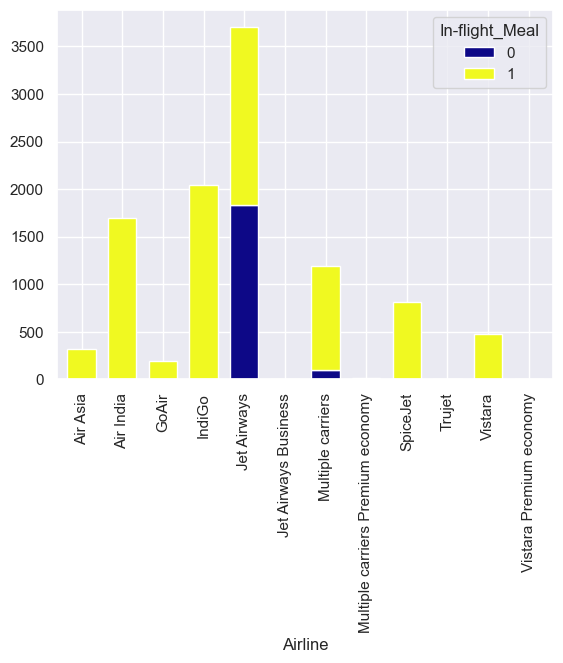

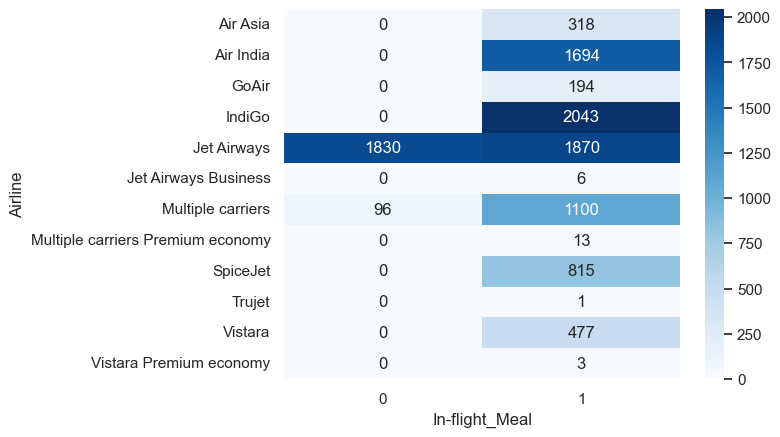

In [43]:
# Exploring the distribution between "Airline" and "In-flight_Meal"

bivariate_cvc_eda(df_eda, "Airline", "In-flight_Meal")

<b> Insights </b>

* <b>All the Airlines offered</b> their <b>passengers meals</b> during the journey, indicating they <b>prioritize offering meal services</b> to passengers.
* <b>IndiGO Airlines</b> offered <b>meals</b> to their <b>passengers the most</b>, followed by <b>Jet Airways</b> and <b>Air India</b>.
* <b>Airlines</b> like <b>Vistara, Trujet and Multiple carriers</b> have <b>limited in-flight meals</b> for passengers, potentially <b>catering</b> to those <b>seeking more budget-friendly options without meal services</b>. 

Overnight_Flight                      0     1
Airline                                      
Air Asia                            213   105
Air India                           785   909
GoAir                               174    20
IndiGo                             1650   393
Jet Airways                        1569  2131
Jet Airways Business                  4     2
Multiple carriers                   904   292
Multiple carriers Premium economy    12     1
SpiceJet                            674   141
Trujet                                1     0
Vistara                             331   146
Vistara Premium economy               3     0



<Figure size 1000x600 with 0 Axes>

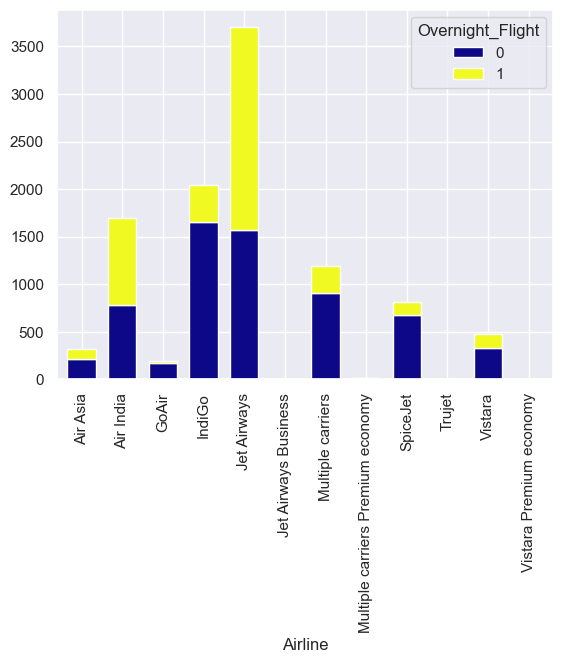

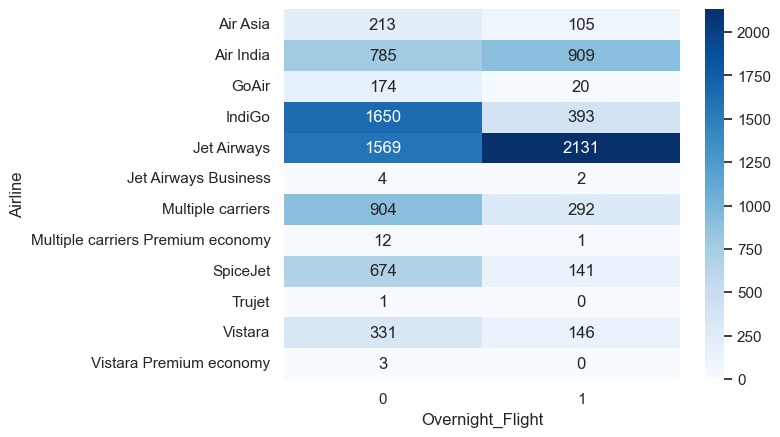

In [44]:
# Exploring the distribution between "Airline" and "Overnight_Flight"

bivariate_cvc_eda(df_eda, "Airline", "Overnight_Flight")

<b> Insights </b>

* <b>Except</b> for <b>Vistara Premium Economy</b> and <b>Trujet</b>, <b>all the airlines offer both day and overnight flights</b>.
* <b>Jet Airways</b> is the <b>preferred choice</b> for <b>passengers</b>, whether for <b>daytime or overnight flights</b>.
* <b>Jet Airways</b>, <b>Air India</b> and <b>IndiGo</b> are the <b>Airlines</b> that <b>majority of passengers choose for overnight flights</b>. 

Destination  Bangalore  Cochin  Delhi  Hyderabad  Kolkata
Source                                                   
Bangalore            0       0   2177          0        0
Chennai              0       0      0          0      381
Delhi                0    4345      0          0        0
Kolkata           2860       0      0          0        0
Mumbai               0       0      0        697        0



<Figure size 1000x600 with 0 Axes>

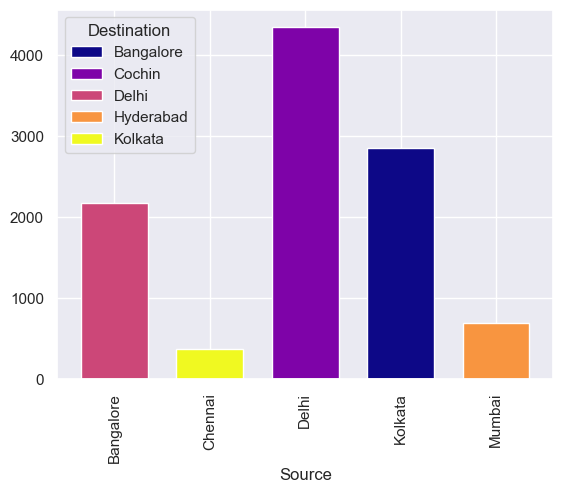

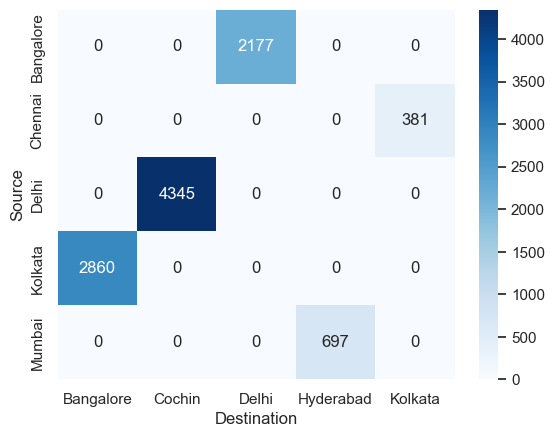

In [45]:
# Exploring the distribution between "Source" and "Destination"

bivariate_cvc_eda(df_eda, "Source", "Destination")

<b> Insights </b>

* The <b>majority</b> of the <b>passengers traveled</b> on the <b>Delhi to Cochin routes</b>, followed by the <b>Bangalore to Delhi</b> and <b>Kolkata to Bangalore routes</b>.
* The <b>fewest passengers</b> travelled between <b>Mumbai to Hyderabad</b>, as well as between <b>Chennai to Kolkata</b>.

Overnight_Flight     0     1
Source                      
Bangalore         1666   511
Chennai            354    27
Delhi             2293  2052
Kolkata           1390  1470
Mumbai             617    80



<Figure size 1000x600 with 0 Axes>

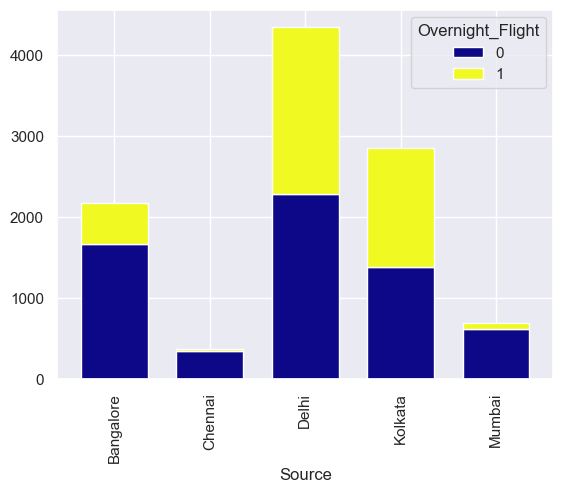

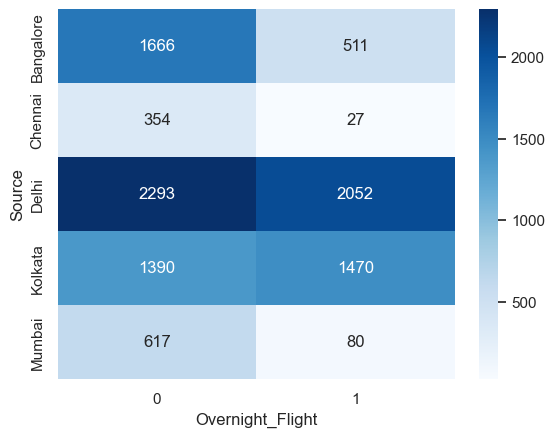

In [46]:
# Exploring the distribution between "Source" and "Overnight_Flight"

bivariate_cvc_eda(df_eda, "Source", "Overnight_Flight")

<b> Insights </b>

* The <b>majority</b> of the passengers travelling from <b>Delhi opted for Overnight travel</b>, followed by those from <b>Kolkata</b> and <b>Bangalore</b>. 

Overnight_Flight     0     1
Destination                 
Bangalore         1390  1470
Cochin            2293  2052
Delhi             1666   511
Hyderabad          617    80
Kolkata            354    27



<Figure size 1000x600 with 0 Axes>

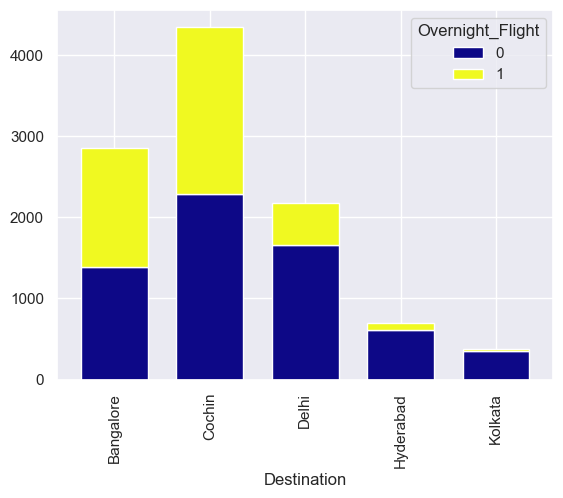

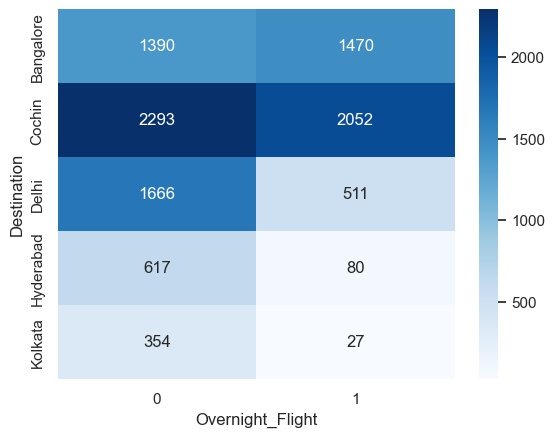

In [47]:
# Exploring the distribution between "Destination" and "Overnight"

bivariate_cvc_eda(df_eda, "Destination", "Overnight_Flight")

<b> Insights </b>

* The <b>majority</b> of passengers who <b>arrived</b> in <b>Delhi opted</b> for <b>Overnight flights</b>, followed by those in <b>Bangalore</b> and <b>Kolkata</b>. 

Overnight_Flight     0     1
In-flight_Meal              
0                  810  1116
1                 5510  3024



<Figure size 1000x600 with 0 Axes>

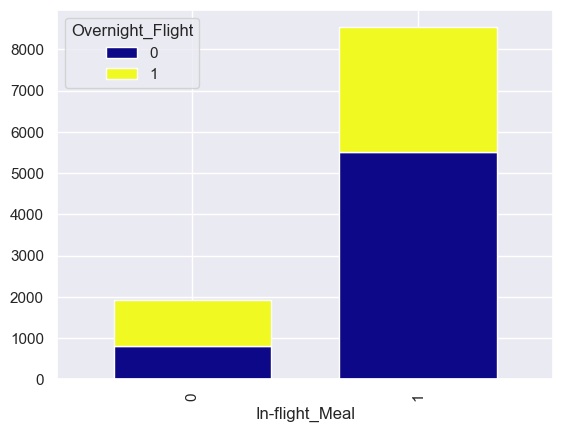

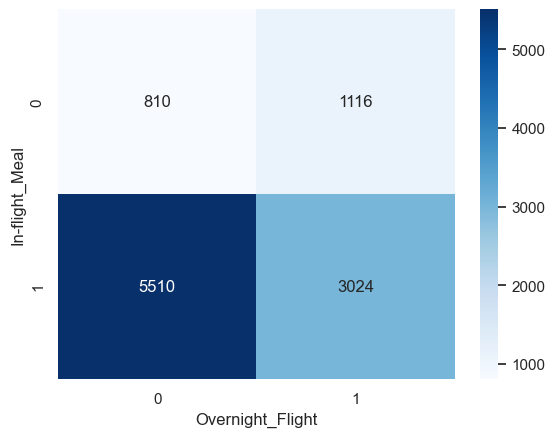

In [48]:
# Exploring the distribution between "In-flight_Meal" and "Overnight_Flight"

bivariate_cvc_eda(df_eda, "In-flight_Meal", "Overnight_Flight")

<b> Insights </b>

* The <b>majority</b> of the passengers who <b>travelled</b> during the <b>day opted for meals</b> compared to <b>overnight passengers</b>.

# Pre-Processing (II)

In [49]:
# Creating a function to perform data preprocessing

# Creating a copy of the data

df_1 = df.copy()

def pre_processing_3(data):
    
    # Converting the features to object type
    to_int = ["Total_Stops", "In-flight_Meal", "Overnight_Flight"]
    for col in to_int:
        data[col] = data[col].astype("O")
        
    # Dropping irrelevant features
    data.drop(columns = ["Route", "Duration_Hours", "Duration_Minutes", "Additional_Info"], inplace = True)
        
pre_processing_3(df_1)

# Feature Engineering & Selection

In [50]:
print('\033[1m' + f"The total number of null values in the dataset : {df_1.isna().sum().sum()}" + '\033[0m')

The total number of null values in the dataset : 0


<b> Since the dataset does not contain any null values, NaN Imputation is not required. </b>

## Outlier Treatment 

							    Total_Duration

						Before & After Outlier Treatment


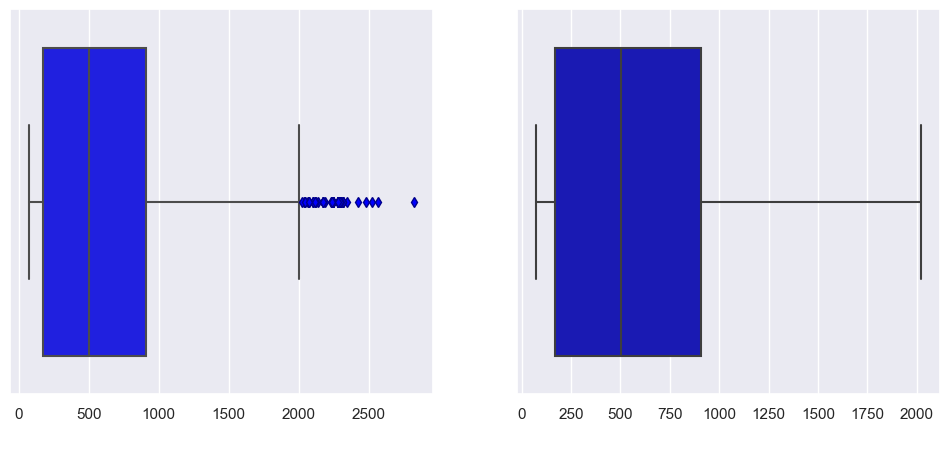

In [51]:
# Creating a function to handle outliers

def impute_outliers(data):
    
    for col in data.select_dtypes(include = [int, float]).drop(columns = ["Price", "Month"]).columns:
        
        # Checking for outliers in the feature
        Q1, Q3 = data[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outlier_count = len(data[col][(data[col] < lower_bound) | (data[col] > upper_bound)])
        
        # Replacing outliers with the lower and upper bound values of the feature
        if outlier_count != 0:
            print('\033[1m' + f"\t\t\t\t\t\t\t    {col}\n\n\t\t\t\t\t\tBefore & After Outlier Treatment" + '\033[0m')
            
            # Plotting the graphs to check the distribution of the features before and after imputing outliers
            fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
            sns.boxplot(x = data[col], color = "blue", ax = ax[0], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            data[col] = np.where(data[col] < lower_bound, np.round(lower_bound, 2), np.where(data[col] > upper_bound, np.round(upper_bound, 2), data[col]))
            sns.boxplot(x = data[col], color = "mediumblue", ax = ax[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            ax[0].set_xlabel(" ")
            ax[1].set_xlabel(" ")
            plt.show()
        else:
            pass
        
impute_outliers(df_1)

## Log Transformation

Since the "Price" feature is not normally distributed, there won't be a linear relationship between the dependent variables and "Price", which means the Linearity assumption won't be satisfied. However, applying a log transformation to the "Price" feature will make it normally distributed and later take exponential to get the original predictions.


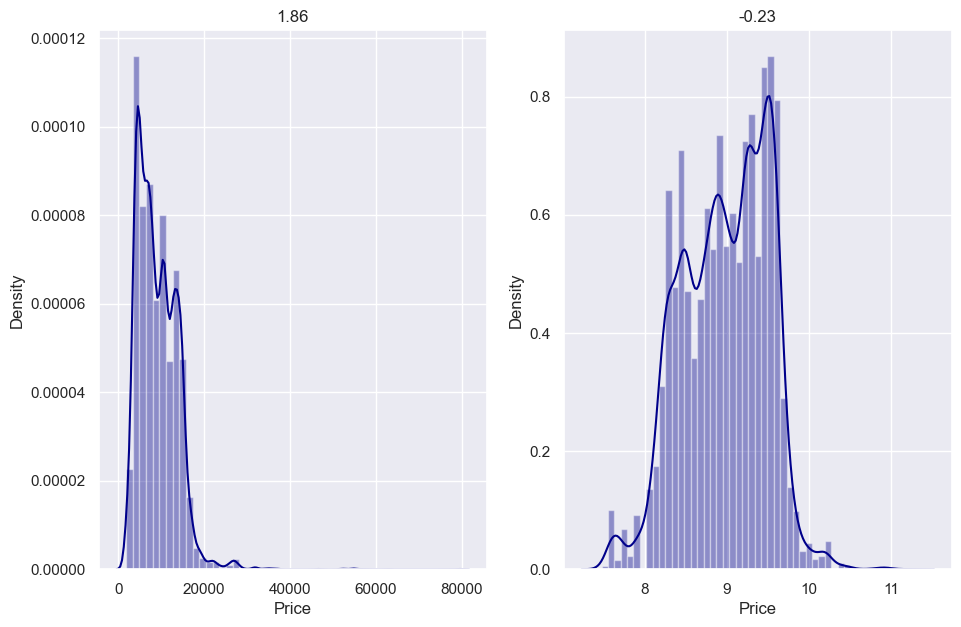

In [52]:
# Checking the distribution of the "Price" feature

plt.figure(figsize = (11, 7))

plt.subplot(1, 2, 1)
sns.distplot(df_1["Price"], color = "darkblue")
plt.title(np.round(df_1["Price"].skew(), 2))
print('\033[1m' + 'Since the "Price" feature is not normally distributed, there won\'t be a linear relationship between the dependent variables and "Price", which means the Linearity assumption won\'t be satisfied. However, applying a log transformation to the "Price" feature will make it normally distributed and later take exponential to get the original predictions.' + '\033[0m')

# Appling log transformation on the "Price" feature

plt.subplot(1, 2, 2)
df_1["Price"] = np.log1p(df_1["Price"])
sns.distplot(df_1["Price"], color = "darkblue")
plt.title(np.round(df_1["Price"].skew(), 2))
plt.show()

## Forward Elimination - I

In [53]:
# Creating a function to check statistical significance of the features

def feature_significance(data, target):
    
    X = data.drop(columns = "Price")
    y = data["Price"]
    
    for col in data.select_dtypes(exclude = [int, float]).columns:
        X[col] = LabelEncoder().fit_transform(X[col])
    
    p_values = pd.Series(np.round(f_regression(X, y)[1], 3), X.columns)
    non_significant_features = p_values[p_values > 0.05].to_dict()
    
    if len(non_significant_features) != 0:
        print('\033[1m' + f"Non-significant Features (p-value > 0.05)\n" + '\033[0m')
        for col, pval in non_significant_features.items():
            if pval > 0.05:
                print(f"{col} : {pval}")
            else:
                pass
    else:
        print('\033[1m' + "All features are statistically significant." + '\033[0m')
        
print('\033[1m' + "BEFORE DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
feature_significance(df_1, "Price")

# Dropping the non-significant features

df_1.drop(columns = ["Source", "Day_of_Week", "Dep_Time_Hour"], inplace = True)

print('\033[1m' + "\nAFTER DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
feature_significance(df_1, "Price")

BEFORE DROPPING THE CORRELATED FEATURES

Non-significant Features (p-value > 0.05)

Source : 0.118
Day_of_Week : 0.086
Dep_Time_Hour : 0.456

AFTER DROPPING THE CORRELATED FEATURES

All features are statistically significant.


## Multicollinearity - I

In [54]:
def multicollinearity(data, col):
    
    X = data.drop(columns = [col])
    
    for col in data.select_dtypes(exclude = [int, float]).columns:
        X[col] = LabelEncoder().fit_transform(X[[col]])
        
    X_sc = StandardScaler().fit_transform(X)
    
    vif = pd.Series([np.round(variance_inflation_factor(X_sc, col), 3) for col in range(X_sc.shape[1])], index = X.columns)
    
    high_vif = pd.Series()
    
    for col in vif.index:
        if vif[col] > 5:
            high_vif[col] = vif[col]
        else:
            pass
    
    high_vif.sort_values(ascending = False, inplace = True)
    
    if len(high_vif) != 0:
        print('\033[1m' + "Features (VIF > 5)\n" + '\033[0m')
        print(high_vif)
    else:
        print('\033[1m' + "There is no Multicollinearity." + '\033[0m')

multicollinearity(df_1, "Price")

There is no Multicollinearity.


## Feature Encoding 

In [55]:
# Creating a function to perform feature encoding on the data

df_2 = df_1.copy()

def feature_encoder(data):
    
    data["Index"] = list(range(len(data)))
    
    # Creating a dataframe to store the encoded data
    en_df = pd.DataFrame({"Index" : list(range(len(data)))})
    
    # Applying One hot encoding technique
    for col in data.select_dtypes("O").columns:
        data[col] = data[col].astype(str)
        
        # Creating an encoded dataframe contaning encoded values
        en_col = pd.DataFrame(OneHotEncoder(sparse = False, drop = [data[col].value_counts().index[-1]], dtype = int).fit_transform(data[[col]]), columns = f"{col}_" + data[col].value_counts().index[:-1])        
        en_df = pd.concat([en_df, en_col], axis = 1)
        data.drop(columns = [col], inplace = True)
        
    return en_df

df_2 = df_2.merge(feature_encoder(df_2),on = "Index").drop(columns = ["Index"])

df_2

Price  Day  Month  Arrival_Time_Hour  Arrival_Time_Minute  \
0      8.268219   24      3                  1                   10   
1      8.944159    5      1                 13                   15   
2      9.538420    6      9                  4                   25   
3      8.735364    5     12                 23                   30   
4      9.495745    3      1                 21                   35   
...         ...  ...    ...                ...                  ...   
10455  8.320692    4      9                 22                   25   
10456  8.329899   27      4                 23                   20   
10457  8.885994   27      4                 11                   20   
10458  9.445333    3      1                 14                   10   
10459  9.371949    5      9                 19                   15   

       Dep_Time_Minute  Total_Duration  Airline_Jet Airways  Airline_IndiGo  \
0                   20           170.0                    0               0   
1                   50           445.0                    0               1   
2                   25          1140.0                    0               0   
3                    5           325.0                    0               0   
4                   50           285.0                    0               0   
...                ...             ...                  ...             ...   
10455               55           150.0                    1               0   
10456               45           155.0                    0               1   
10457               20           180.0                    0               0   
10458               30           160.0                    0               0   
10459               55           500.0                    0               1   

       Airline_Air India  ...  Destination_Cochin  Destination_Bangalore  \
0                      0  ...                   0                      0   
1                      0  ...                   1                      0   
2                      0  ...                   0                      1   
3                      0  ...                   1                      0   
4                      0  ...                   0                      0   
...                  ...  ...                 ...                    ...   
10455                  0  ...                   1                      0   
10456                  0  ...                   1                      0   
10457                  0  ...                   0                      0   
10458                  0  ...                   0                      0   
10459                  0  ...                   0                      1   

       Destination_Delhi  Destination_Hyderabad  Total_Stops_1  Total_Stops_0  \
0                      1                      0              1              0   
1                      0                      0              0              0   
2                      0                      0              0              0   
3                      0                      0              0              1   
4                      1                      0              0              1   
...                  ...                    ...            ...            ...   
10455                  0                      0              1              0   
10456                  0                      0              1              0   
10457                  1                      0              1              0   
10458                  1                      0              1              0   
10459                  0                      0              0              0   

       Total_Stops_2  Total_Stops_3  In-flight_Meal_1  Overnight_Flight_0  
0                  0              0                 1                   0  
1                  1              0                 1                   1  
2                  1              0                 1                   0  
3                 

## Forward Elimination - II 

In [56]:
print('\033[1m' + "BEFORE DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
feature_significance(df_2, "Price")

print('\033[1m' + "\nAFTER DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
df_2.drop(columns = ["Airline_Vistara Premium economy"], inplace = True)
feature_significance(df_2, "Price")

# # Dropping the non-significant features
# df_2.drop(columns = ["Airline_GoAir", "Airline_Vistara Premium economy", "Destination_Cochin"], inplace = True)
# feature_significance(df_2, "Price")

BEFORE DROPPING THE CORRELATED FEATURES

Non-significant Features (p-value > 0.05)

Airline_Vistara Premium economy : 0.784

AFTER DROPPING THE CORRELATED FEATURES

All features are statistically significant.


## Multicollinearity - II

In [57]:
print('\033[1m' + "BEFORE DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
multicollinearity(df_2, "Price")

# Dropping the correlated features with VIF > 5
df_2.drop(columns = ["Total_Stops_0"], inplace = True)
# multicollinearity(df_2, "Price")

df_2.drop(columns = ["Airline_SpiceJet"], inplace = True)
# multicollinearity(df_2, "Price")

df_2.drop(columns = ["Destination_Bangalore"], inplace = True)
# multicollinearity(df_2, "Price")

print('\033[1m' + "\nAFTER DROPPING THE CORRELATED FEATURES\n" + '\033[0m')
multicollinearity(df_2, "Price")

BEFORE DROPPING THE CORRELATED FEATURES

Features (VIF > 5)

Total_Stops_0                                2607.787
Total_Stops_1                                2329.560
Total_Stops_2                                1155.044
Airline_SpiceJet                              600.674
Airline_Multiple carriers                     412.606
Airline_IndiGo                                356.840
Airline_Air Asia                              266.767
Airline_Multiple carriers Premium economy     189.243
Airline_Jet Airways Business                  114.993
Airline_Jet Airways                            78.384
Airline_Air India                              48.741
Total_Stops_3                                  43.875
Destination_Bangalore                           9.626
Destination_Cochin                              7.402
Destination_Delhi                               5.703
dtype: float64

AFTER DROPPING THE CORRELATED FEATURES

There is no Multicollinearity.


## Feature Importance 

In [58]:
# Creating a function to select the significant features

def feature_selector(data):
    
    # Seperating the dependent and independent features
    X = data.drop(columns = ["Price"])
    y = data["Price"]
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
    
    # Computing the importance of the features
    importance = mutual_info_regression(X_train, y_train)
    
    # Checking the feature importance
    feature_importance = pd.DataFrame({"Importance" : importance}, index = X.columns)
    print(feature_importance[feature_importance["Importance"] < 0.01].index)
    
feature_selector(df_2)

# df_2.drop(columns = ['Airline_Vistara'], inplace = True)
# df_2.drop(columns = ['Total_Stops_3'], inplace = True)

# feature_selector(df_2)

Index(['Airline_Vistara', 'Airline_GoAir', 'Total_Stops_3'], dtype='object')


## Collinearity 

In [59]:
# # Creating a function to check the correlation

# def collinearity(data):
    
#     plt.figure(figsize = (18, 8))
#     corr = np.round(abs(data.corr())[abs(data.corr()).iloc[1:, 1:] > 0.75].fillna({"Price" : data.corr()["Price"]}), 3).T
#     mask = np.triu(np.ones_like(corr, dtype = bool))    
#     sns.heatmap(corr, mask = mask, cmap = "Blues", annot = True, center = 0, square = True, linewidth = 0.5, cbar_kws = {"shrink" : 0.5})
#     sns.set(style = "darkgrid")
#     plt.show()
    
# #     return corr
    
# collinearity(df_2)

## Feature Scaling 

In [60]:
X = df_2.drop(columns = ["Price"])
y = df_2["Price"]

X_sc = StandardScaler().fit_transform(X)

# Model Building and Evaluation 

In [61]:
# Creating a function to build and evaluate a regression model

def regression_model(MODEL, train, test):
    
    print('\033[1m' + f"\t\t\t\t\tModel : {MODEL}" + '\033[0m\n')
    
    model = MODEL
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 11)

    metrics = []
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predicitons on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating the metrics of the model
    r2_train_score = np.round(r2_score(y_train, y_train_pred), 3)
    r2_test_score = np.round(r2_score(y_test, y_test_pred), 3)
    variance = str(np.round((r2_train_score * 100) - (r2_test_score * 100), 3)) + "%"
    adj_r2_train = np.round(1 - (1 - r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] -1), 3)
    adj_r2_test = np.round(1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] -1), 3)
    mse = np.round(mean_squared_error(y_test, y_test_pred), 2)
    rmse = np.round(np.sqrt(mse), 2)
    mae = np.round(mean_squared_error(y_test, y_test_pred), 2)
    scores = cross_val_score(model, train, test, cv = 5, scoring = "neg_mean_squared_error").mean()

    metrics.extend([r2_train_score, r2_test_score, variance, adj_r2_train, adj_r2_test, mse, rmse, mae, scores])
    print(pd.DataFrame(metrics, 
                       index = ["r2_score (Train)", "r2_score (Test)", "Variance", "Adjusted_r2 (Train)", "Adjusted_r2 (Test)", "MSE", "RMSE", "MAE", "Cross_val_nmse (5-folds)",], 
                       columns = ["Metrics"]))
    
    # Plotting the actual vs predicted results
    plt.figure(figsize = (16, 7))
    sns.scatterplot(x = y_test, y = y_test_pred, color = "darkblue", edgecolor = "white")
    sns.regplot(x = y_test, y = y_test_pred, scatter = False, color = "black", line_kws = {"color" : "black"})
    plt.xlabel("Actual", color = "black", size = 14)
    plt.ylabel("Predicted", color = "black", size = 14)
    plt.title(f"Actual vs Predicted Price", color = "black", size = 16)
    plt.show()
    print(f"\n\n")
    
    # Checking the normality of the residuals
    plt.figure(figsize = (16, 7))
    residuals = y_test - y_test_pred
    plt.subplot(1, 2, 1)
    sns.kdeplot(residuals, color = "darkblue")
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist = "norm", plot = plt)
    plt.suptitle("Residuals Distribution", color = "black", size = 16)
    plt.show()
    print(f"\n\n")
    
    # Checking for homoscedasticity
    plt.figure(figsize = (16, 7))
    sns.scatterplot(x = y_test_pred, y = residuals, color = "darkblue")
    plt.axhline(y = 0, color = "red", linewidth = 2)
    plt.xlabel("Predictions", size = 14, color = "black")
    plt.ylabel("Residuals", size = 14, color = "black")
    plt.title("Predicted vs Residuals", color = "black", size = 16)
    plt.show()
    print(f"\n\n")
    
    return model, metrics

## Linear Regression

					Model : LinearRegression()

                           Metrics
r2_score (Train)             0.758
r2_score (Test)              0.753
Variance                      0.5%
Adjusted_r2 (Train)          0.757
Adjusted_r2 (Test)            0.75
MSE                           0.07
RMSE                          0.26
MAE                           0.07
Cross_val_nmse (5-folds) -0.064759


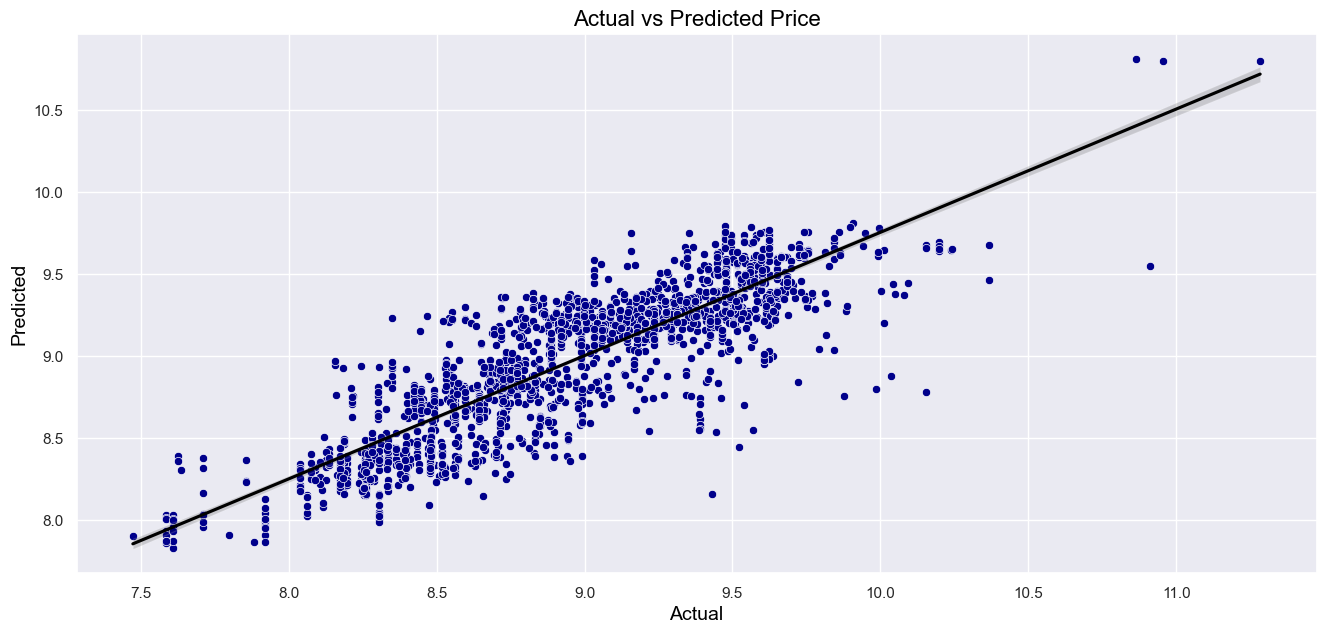

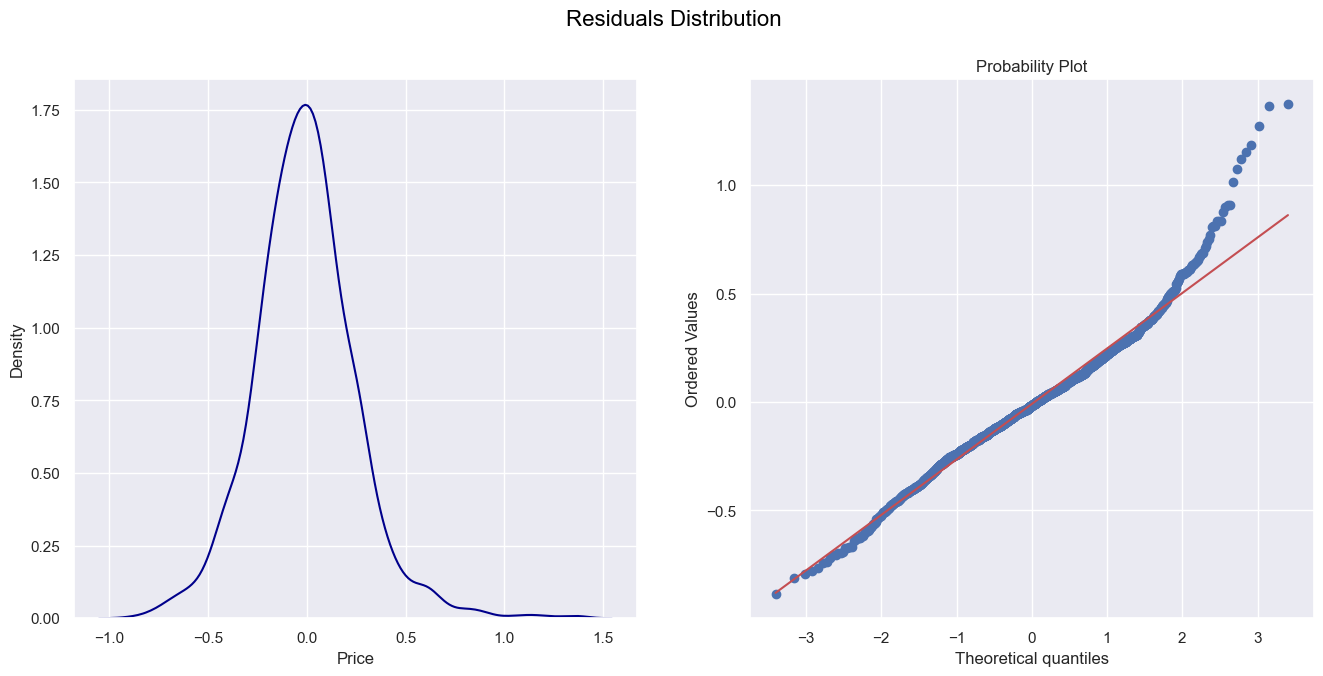

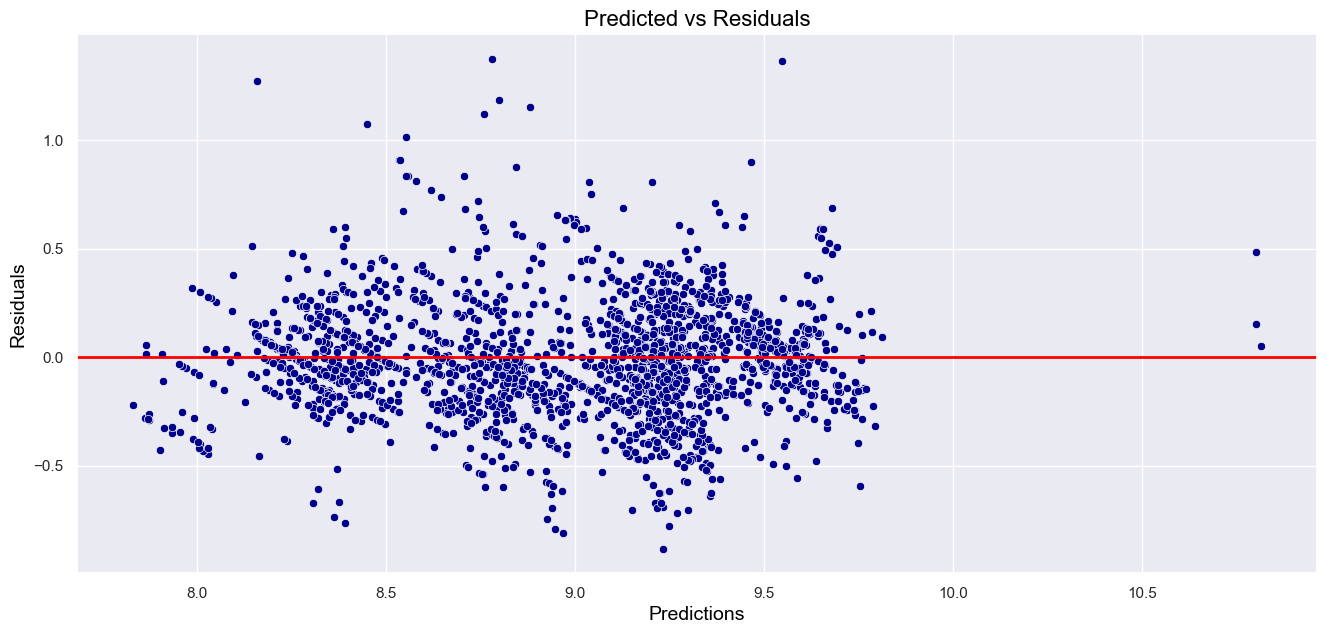

In [62]:
lr_base_model, lr_base_metrics = regression_model(LinearRegression(), X_sc, y)

## OLS 

In [63]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
lr.fit(X_train, y_train)

reg_model = smf.OLS(endog = y_train, exog = X_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.181e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:19:13   Log-Likelihood:                         -15559.
No. Observations:                8368   AIC:                                  3.116e+04
Df Residuals:                    8345   BIC:                                  3.133e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Day                                           0.0617      0.002     32.612      0.000       0.058       0.065
Month                                         0.2157      0.005     40.160      0.000       0.205       0.226
Arrival_Time_Hour                            -0.0144      0.004     -3.663      0.000      -0.022      -0.007
Arrival_Time_Minute                           0.0271      0.001     25.775      0.000       0.025       0.029
Dep_Time_Minute                               0.0180      0.001     19.475      0.000       0.016       0.020
Total_Duration                                0.0040   6.01e-05     65.747      0.000       0.004       0.004
Airline_Jet Airways                          -0.5269      0.109     -4.846      0.000      -0.740      -0.314
Airline_IndiGo                               -0.7182      0.061    -11.839      0.000      -0.837      -0.599
Airline_Air India                            -0.5730      0.136     -4.201      0.000      -0.840      -0.306
Airline_Multiple carriers                     0.0376      0.061      0.617      0.537      -0.082       0.157
Airline_Vistara                               4.5946      0.900      5.106      0.000       2.831       6.358
Airline_Air Asia                              0.8382      0.069     12.118      0.000       0.703       0.974
Airline_GoAir                                 0.4363      0.453      0.964      0.335      -0.451       1.324
Airline_Multiple carriers Premium economy    -0.2645      0.081     -3.271      0.001      -0.423      -0.106
Airline_Jet Airways Business                 -0.7699      0.092     -8.331      0.000      -0.951      -0.589
Destination_Cochin                            0.6914      0.046     15.097      0.000       0.602       0.781
Destination_Delhi                             0.8707      0.055     15.817      0.000       0.763       0.979
Destination_Hyderabad                         0.4583      0.081      5.659      0.000       0.300       0.617
Total_Stops_1                                 0.8699      0.058     14.896      0.000       0.755       0.984
Total_Stops_2                                -0.2547      0.063     -4.055      0.000      -0.378      -0.132
Total_Stops_3                                -1.3235      0.272     -4.861      0.000      -1.857      -0.790
In-flight_Meal_1                              1.7620      0.053     33.321      0.000       1.658       1.866
Overnight_Flight_0                            2.2417      0.069     32.663      0.000       2.107       2.376
==============================================================================
Omnibus:                      124.622   Durbi

## Linear / OLS Assumptions

### Assumption 1 - Linearity

* A linear relationship exists between the independent and dependent features.
* The actual and predicted prices display a linear relationship.

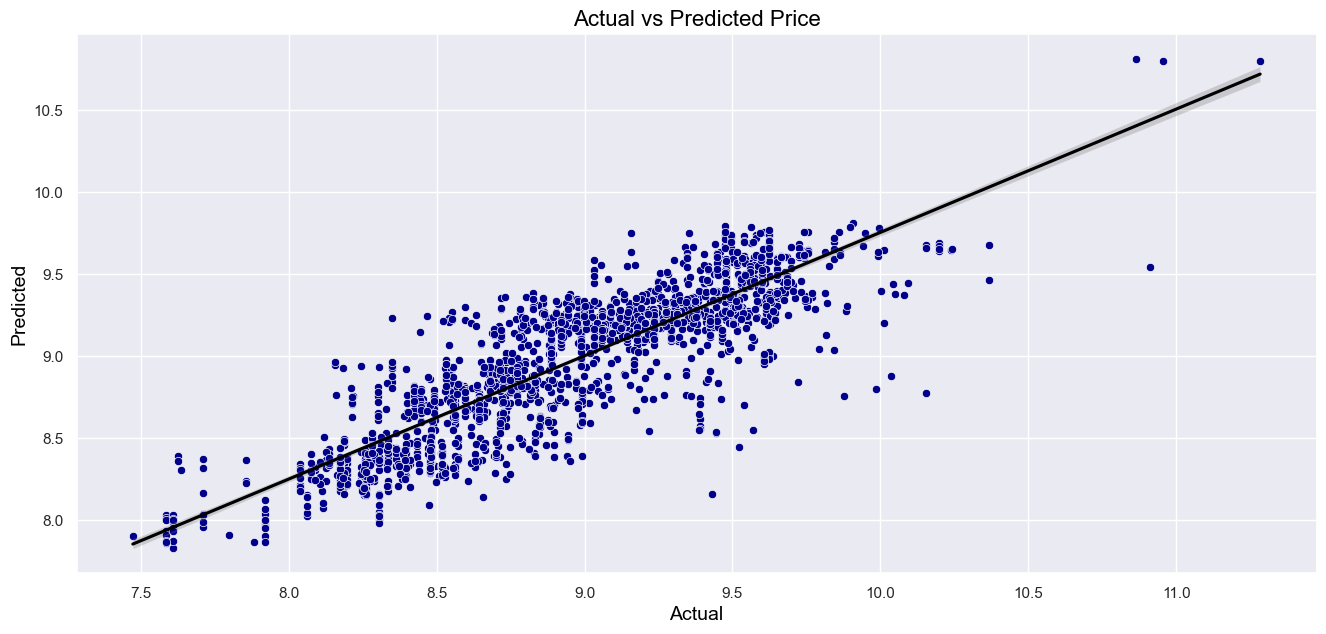

In [64]:
# Verifying the linearity assumption

lr_base_model.fit(X_train, y_train)
    
# Making predicitons on the training and testing data
y_train_pred = lr_base_model.predict(X_train)
y_test_pred = lr_base_model.predict(X_test)

plt.figure(figsize = (16, 7))
sns.scatterplot(x = y_test, y = y_test_pred, color = "darkblue", edgecolor = "white")
sns.regplot(x = y_test, y = y_test_pred, scatter = False, color = "black", line_kws = {"color" : "black"})
plt.xlabel("Actual", color = "black", size = 14)
plt.ylabel("Predicted", color = "black", size = 14)
plt.title(f"Actual vs Predicted Price", color = "black", size = 16)
plt.show()
print(f"\n\n")

### Assumption 2 - No Multicollinearity

* All the independent features have VIF < 5, which indicates the absence of multicollinearity among them.

In [65]:
# Verifying the no multicollinearity assumption

vif = pd.Series([np.round(variance_inflation_factor(X_sc, col), 3) for col in range(X_sc.shape[1])], index = X.columns)

high_vif = pd.Series()

for col in vif.index:
    if vif[col] > 5:
        high_vif[col] = vif[col]
    else:
        pass

high_vif.sort_values(ascending = False, inplace = True)

if len(high_vif) != 0:
    print('\033[1m' + "Features (VIF > 5)\n" + '\033[0m')
    print(high_vif)
else:
    print('\033[1m' + "There is no Multicollinearity." + '\033[0m')

There is no Multicollinearity.


### Assumption 3 - Normality

* Residuals are normally distributed.

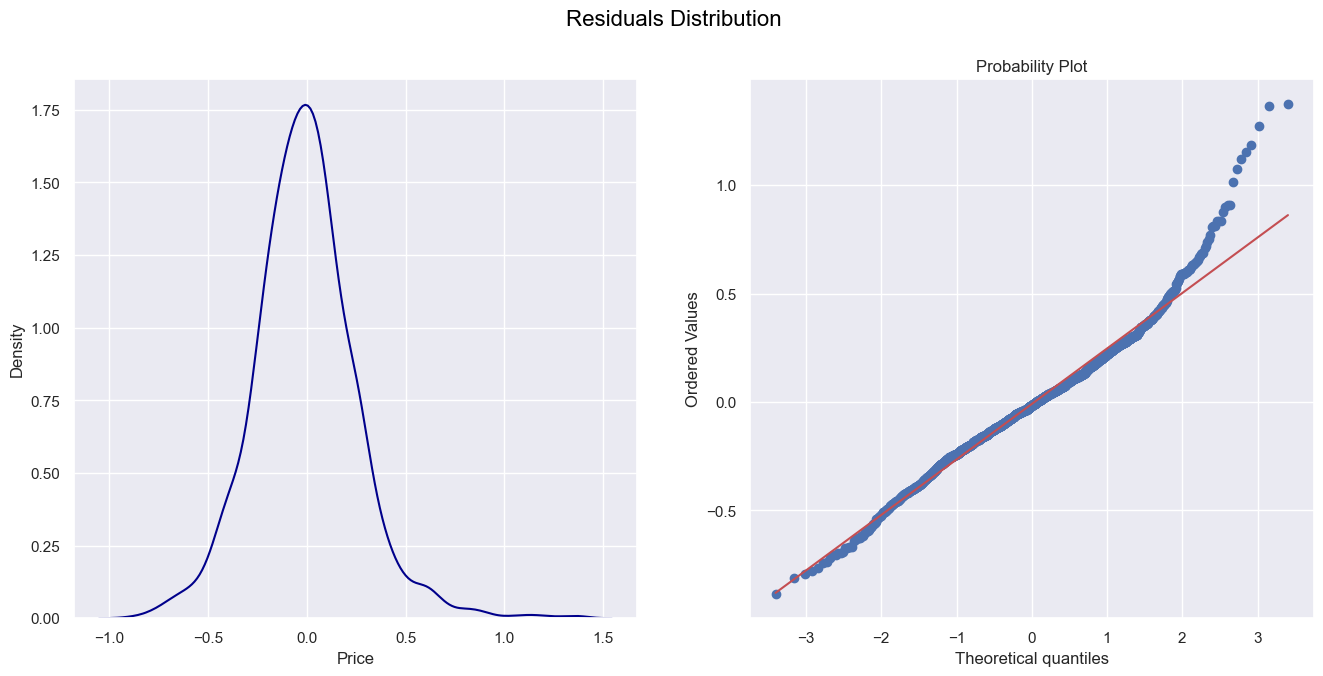

In [66]:
# Verifying the normality assumptions

plt.figure(figsize = (16, 7))
residuals = y_test - y_test_pred
plt.subplot(1, 2, 1)
sns.kdeplot(residuals, color = "darkblue")
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist = "norm", plot = plt)
plt.suptitle("Residuals Distribution", color = "black", size = 16)
plt.show()
print(f"\n\n")

### Assumption 4 - Homoscedasticity

* The residuals exhibit equal variance.

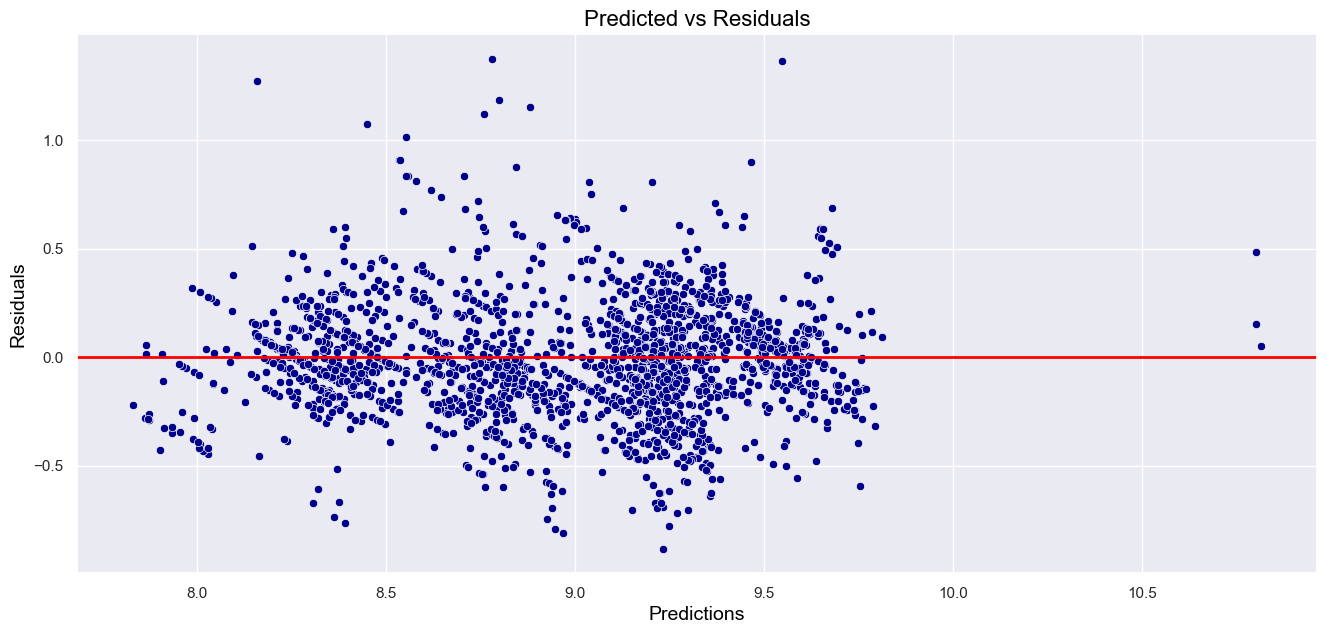

In [67]:
residuals = y_test - y_test_pred
plt.figure(figsize = (16, 7))
sns.scatterplot(x = y_test_pred, y = residuals, color = "darkblue")
plt.axhline(y = 0, color = "red", linewidth = 2)
plt.xlabel("Predictions", size = 14, color = "black")
plt.ylabel("Residuals", size = 14, color = "black")
plt.title("Predicted vs Residuals", color = "black", size = 16)
plt.show()
print(f"\n\n")

### Assumption 5 - No Autocorrelation 

* The Durbin-Watson statistic value is 1.95, which is nearly equal to 2, suggesting the absence of autocorrelation.

In [68]:
residuals = reg_model.resid
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin Watson : {np.round(durbin_watson_statistic, 2)}")

Durbin Watson : 1.95


## Lasso Regression (L1 Regularization)

					Model : Lasso(alpha=0.001)

                           Metrics
r2_score (Train)             0.758
r2_score (Test)              0.753
Variance                      0.5%
Adjusted_r2 (Train)          0.757
Adjusted_r2 (Test)            0.75
MSE                           0.07
RMSE                          0.26
MAE                           0.07
Cross_val_nmse (5-folds) -0.064794


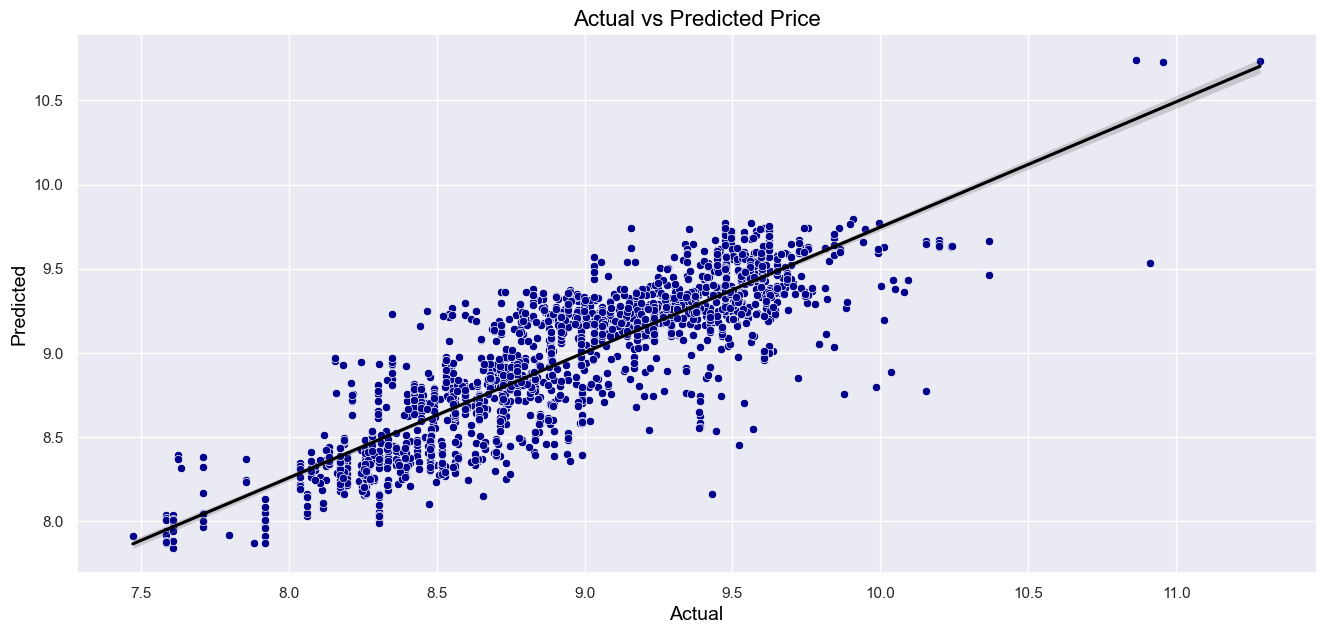

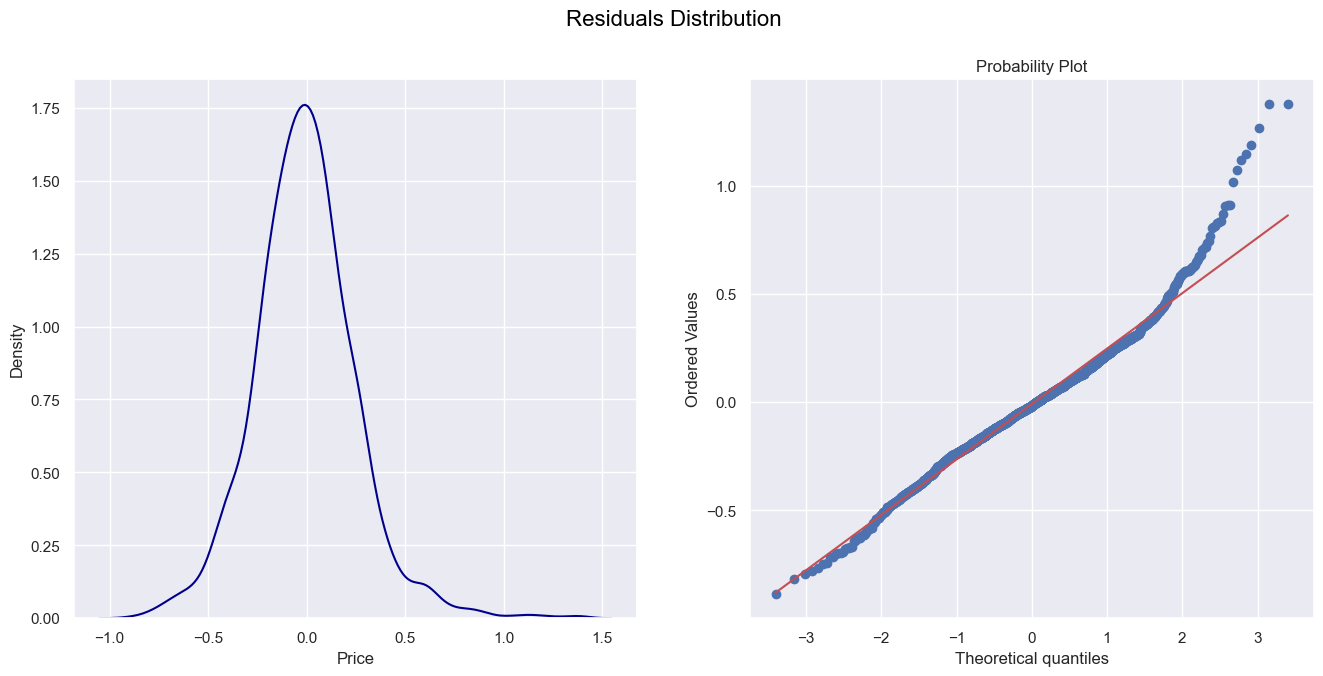

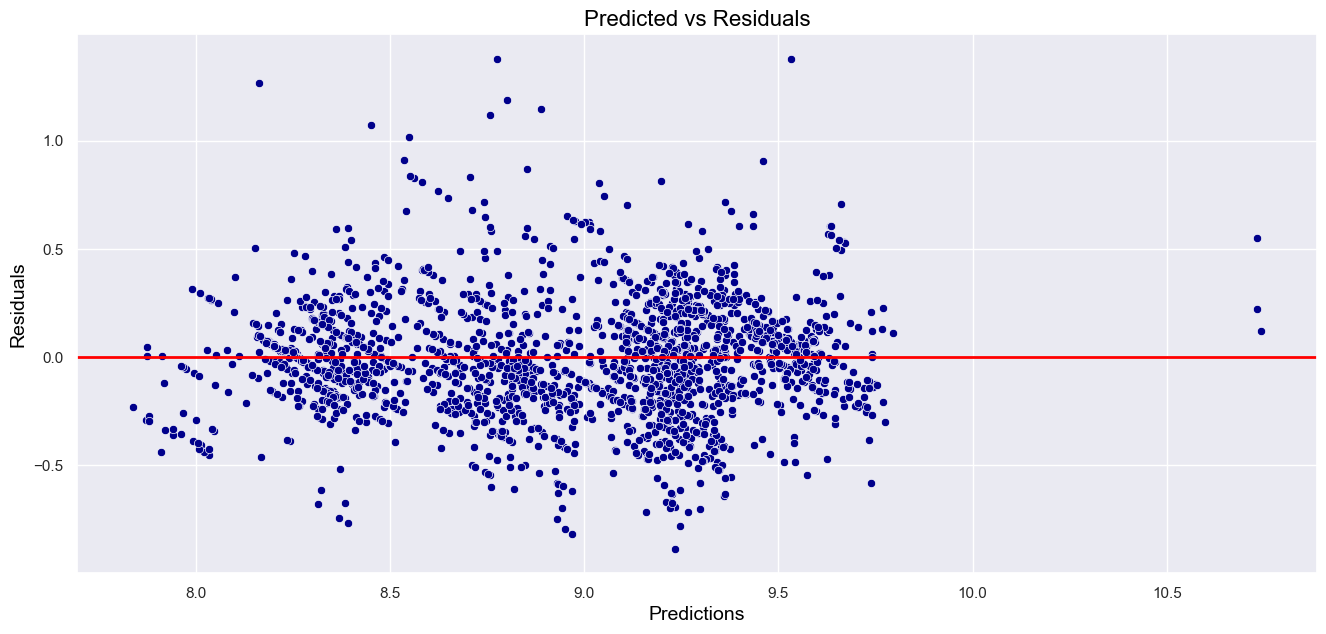

In [69]:
# grid_model = GridSearchCV(Lasso(), param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 5]}, scoring = "r2").fit(X_train, y_train)
# print(grid_model.best_params_)

lasso_model, lasso_metrics = regression_model(Lasso(0.001), X_sc, y)

## Ridge Regression (L2 Regularization)

					Model : Ridge(alpha=0.1)

                           Metrics
r2_score (Train)             0.758
r2_score (Test)              0.753
Variance                      0.5%
Adjusted_r2 (Train)          0.757
Adjusted_r2 (Test)            0.75
MSE                           0.07
RMSE                          0.26
MAE                           0.07
Cross_val_nmse (5-folds) -0.064759


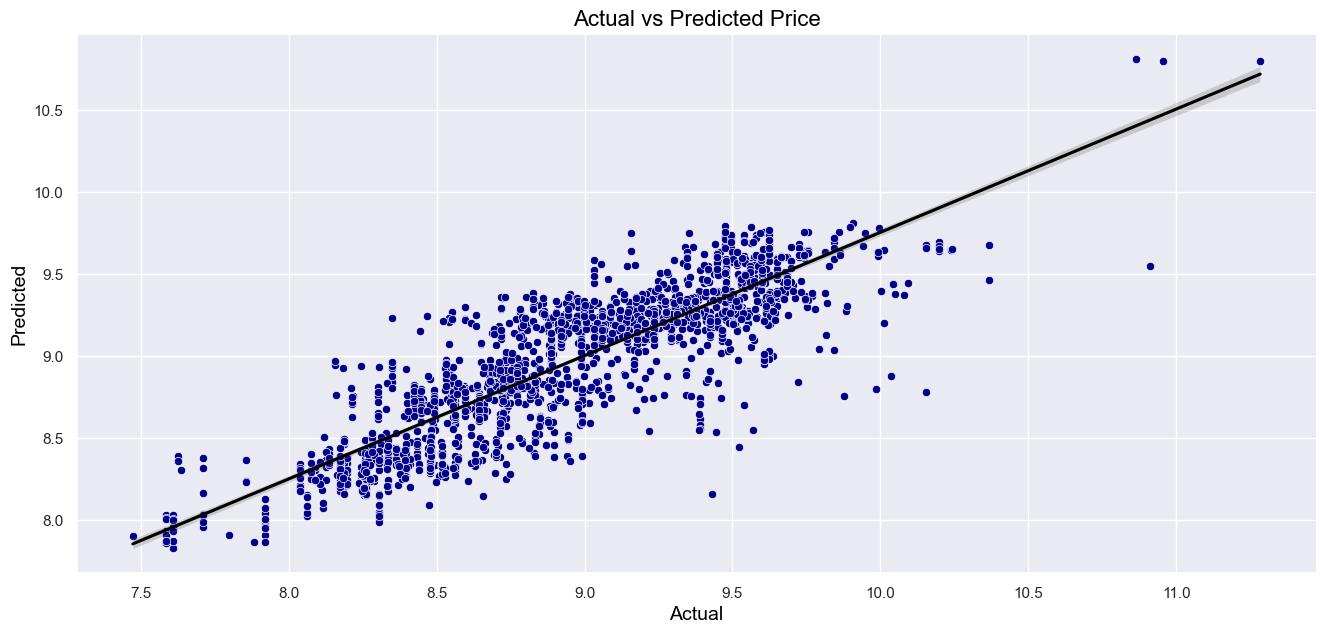

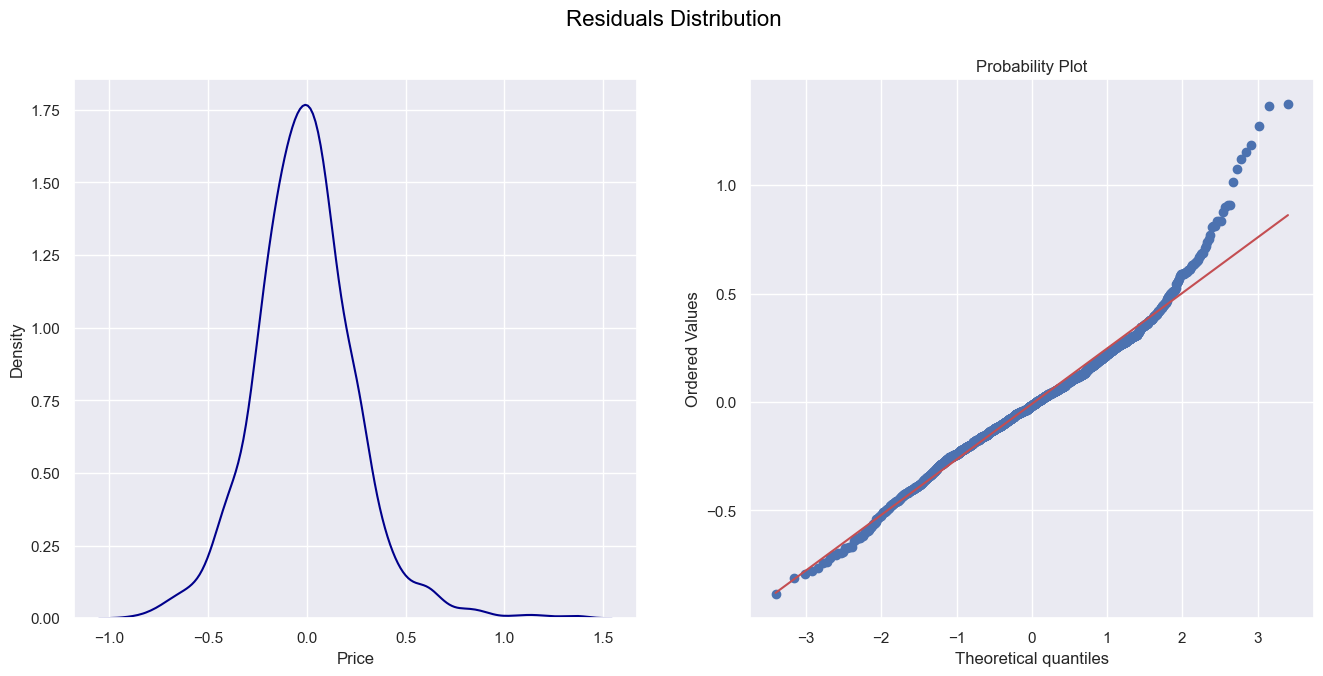

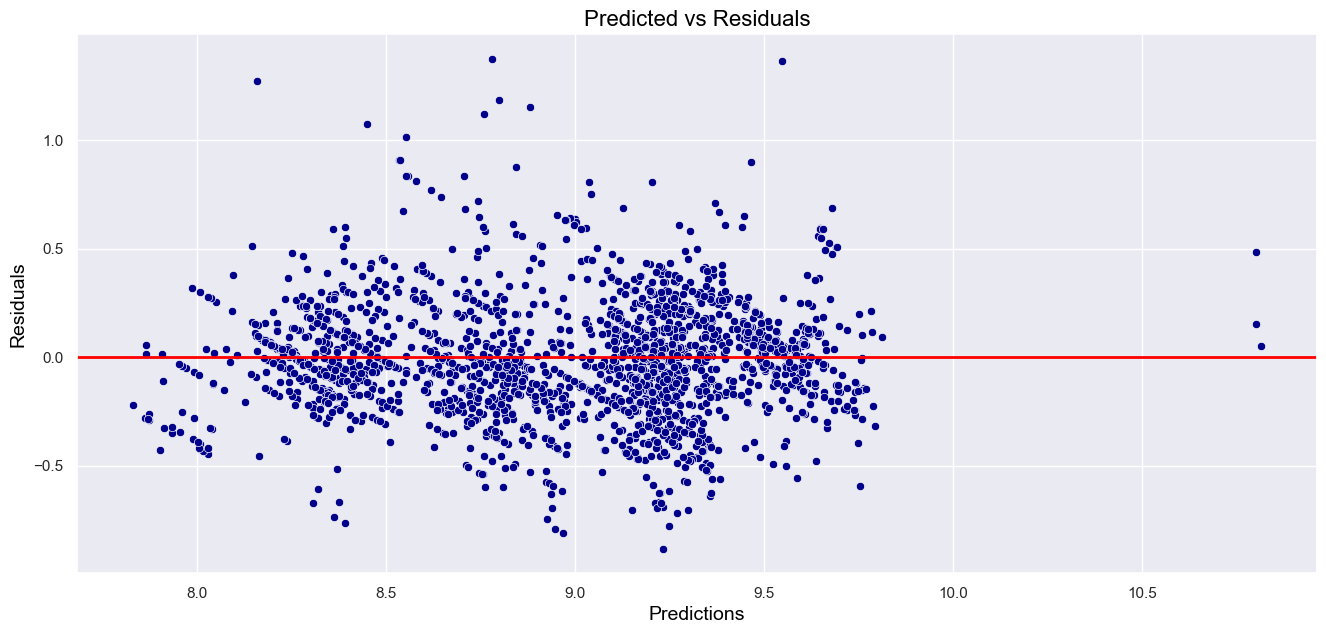

In [70]:
# grid_model = GridSearchCV(Ridge(), param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 5]}, scoring = "r2").fit(X_train, y_train)
# print(grid_model.best_params_)

ridge_model, ridge_metrics = regression_model(Ridge(0.1), X_sc, y)

## Decision Tree Regressor

					Model : DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                      min_samples_split=10)

                           Metrics
r2_score (Train)             0.962
r2_score (Test)              0.914
Variance                      4.8%
Adjusted_r2 (Train)          0.962
Adjusted_r2 (Test)           0.913
MSE                           0.02
RMSE                          0.14
MAE                           0.02
Cross_val_nmse (5-folds) -0.023099


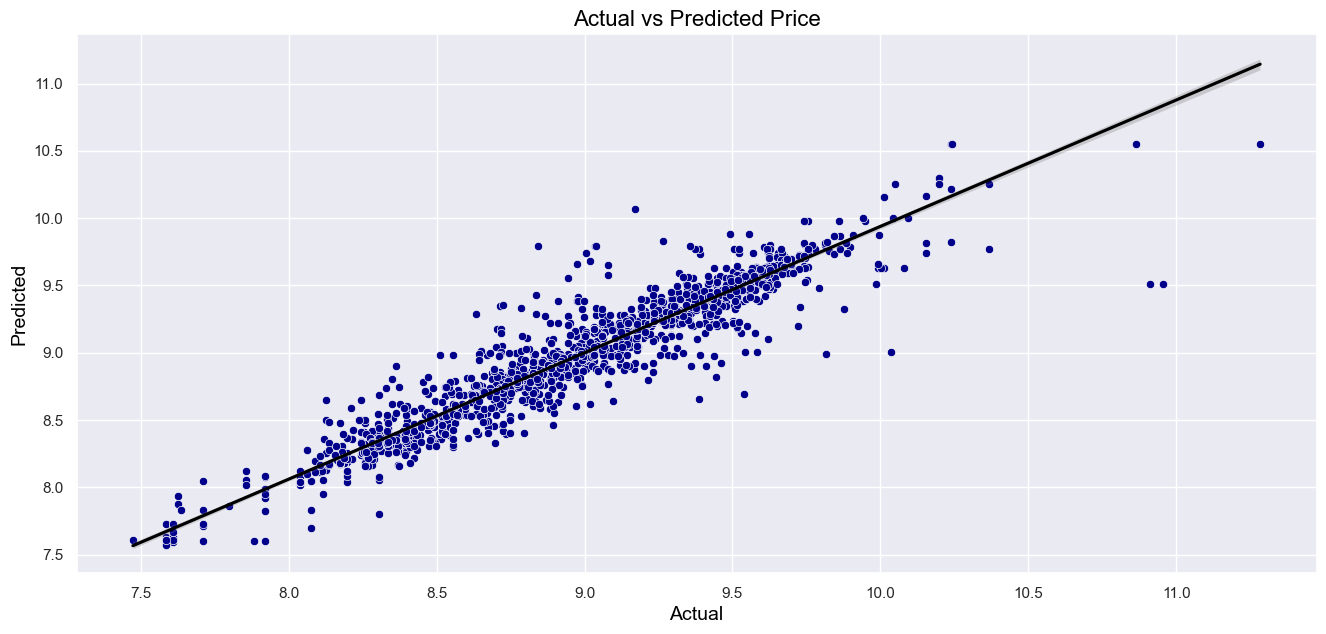

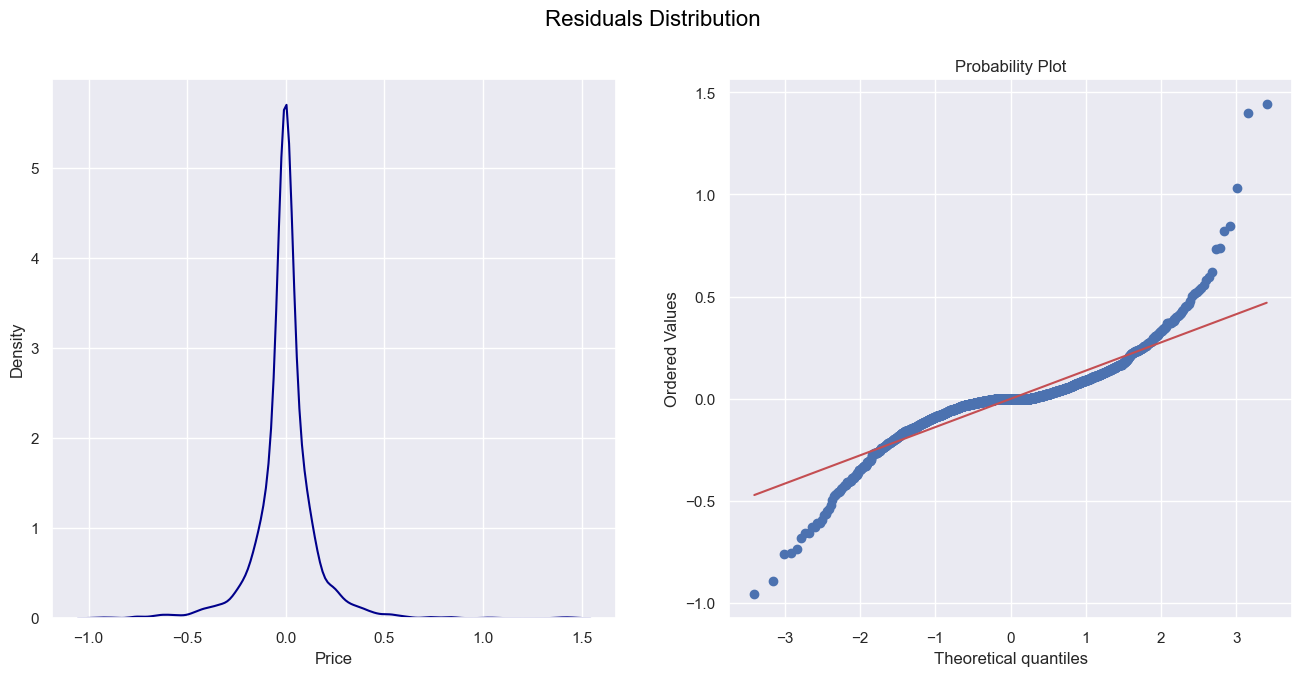

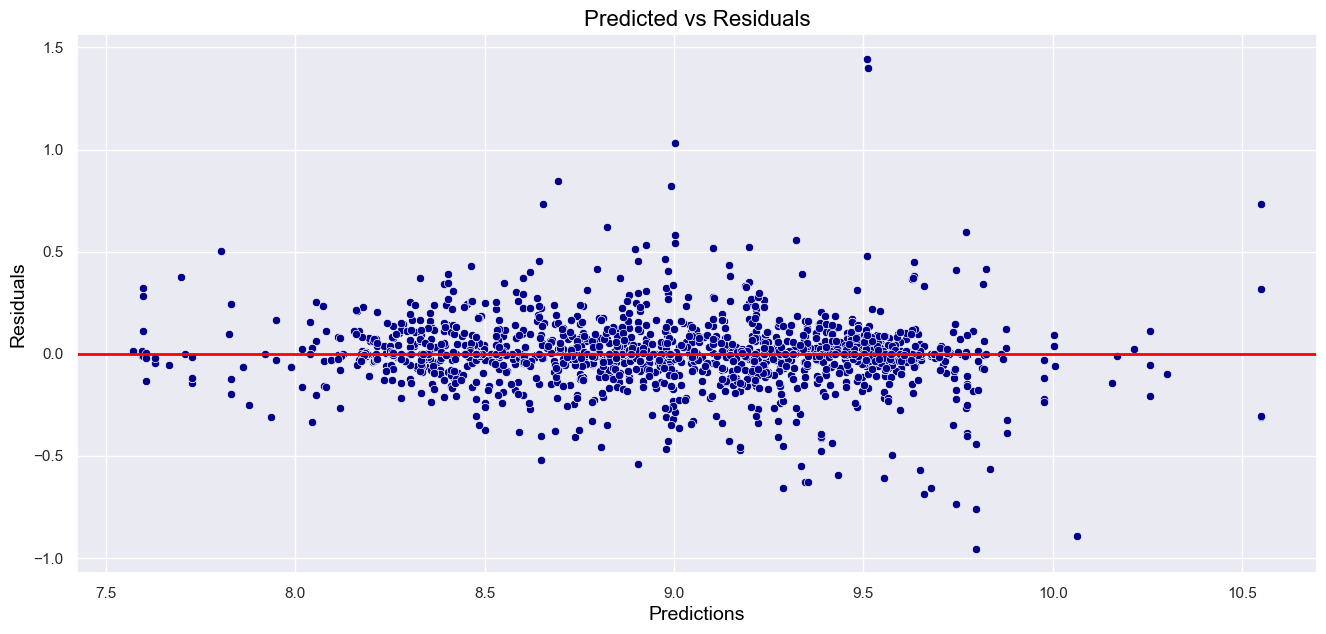

In [71]:
# param_grid = {
#     "max_depth" : [None, 1, 2, 3, 4, 5, 7, 10],
#     "min_samples_split" : [2, 5, 10, 20, 30],
#     "min_samples_leaf" : [1, 2, 3, 4, 5],
#     "max_features" : ['auto', 'sqrt', 'log2']
# }

# grid_model = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring = "r2").fit(X_train, y_train)

# print(grid_model.best_params_)

dt_model, dt_metrics = regression_model(DecisionTreeRegressor(max_depth = None, max_features = "auto", min_samples_leaf = 3, min_samples_split = 10), X, y)

## Random Forest Regressor

					Model : RandomForestRegressor(max_features='auto', min_samples_split=5,
                      n_estimators=200)

                           Metrics
r2_score (Train)             0.979
r2_score (Test)              0.937
Variance                      4.2%
Adjusted_r2 (Train)          0.979
Adjusted_r2 (Test)           0.936
MSE                           0.02
RMSE                          0.14
MAE                           0.02
Cross_val_nmse (5-folds) -0.017326


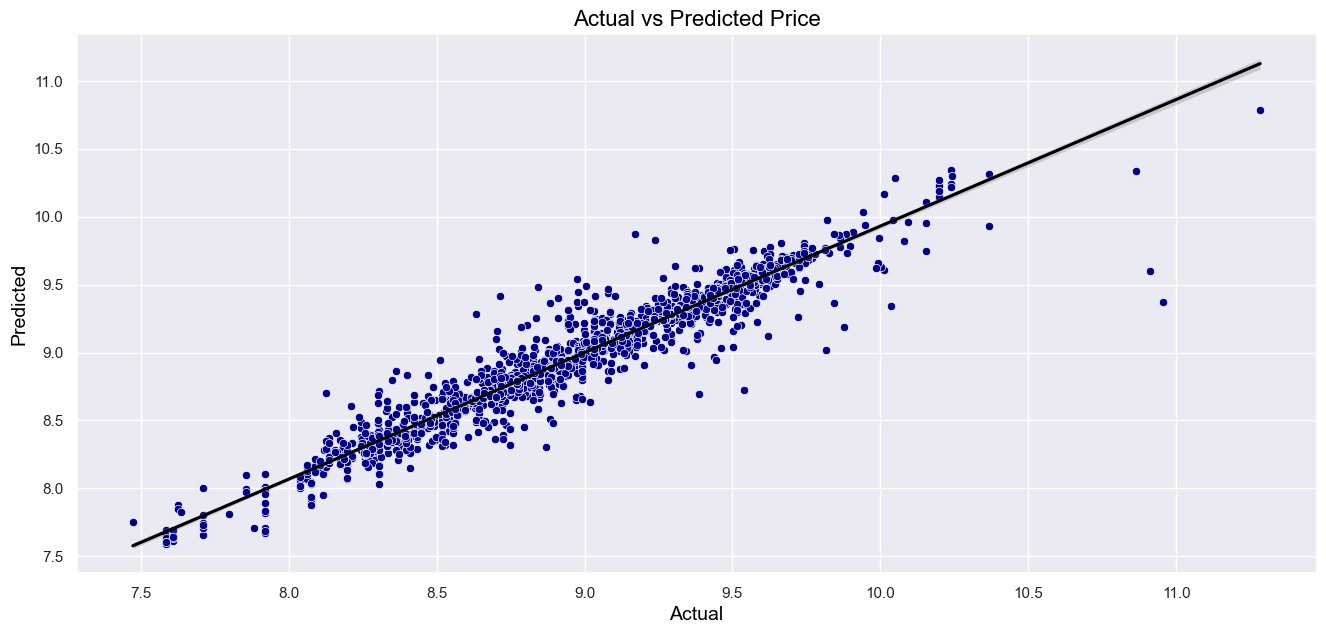

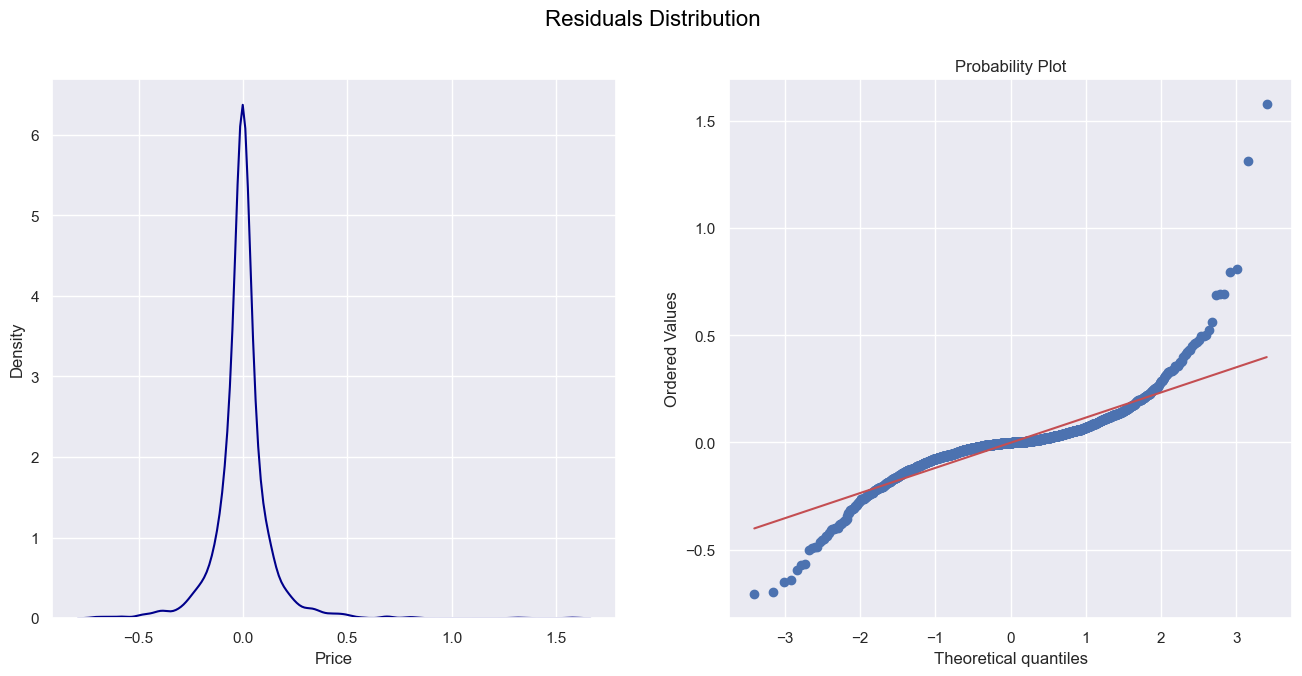

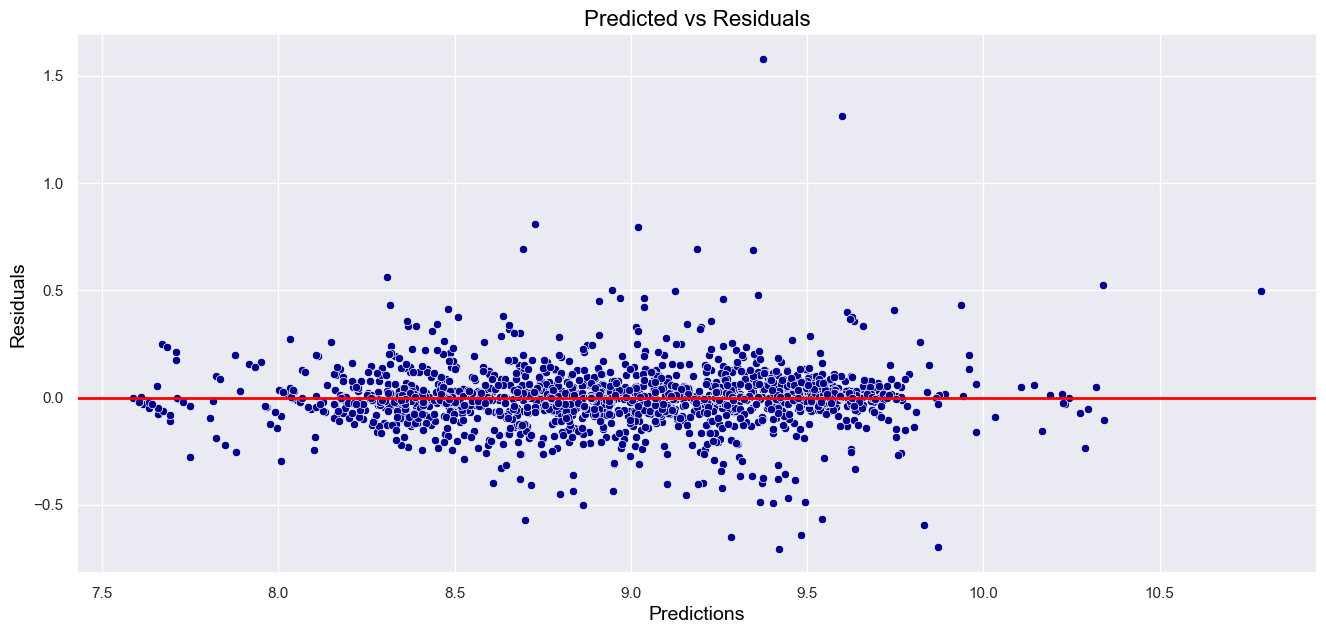

In [72]:
X_sc = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 11)

# param_grid = {"max_depth" : [None, 2, 3, 10],
#               "max_features" : ['auto', 'sqrt', 'log2'],
#               "min_samples_leaf" : [1, 2, 4],
#               "min_samples_split" : [2, 5, 10],
#               "n_estimators" :  [100, 200, 300]
#               }

# grid_model = GridSearchCV(RandomForestRegressor(bootstrap = True), param_grid, scoring = "r2").fit(X_train, y_train)

# print(grid_model.best_params_)

rf_model, rf_metrics = regression_model(RandomForestRegressor(max_depth = None, max_features = "auto", min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200), X_sc, y)

## XGBoost Regressor

					Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

                          Metrics
r2_score (Train)             0.97
r2_score (Test)              0.94
Variance                     3.0%
Adjusted_r2 (Train)         0.969
Adjusted_r2 (Test)          0.939
MSE                          0.02
RMSE   

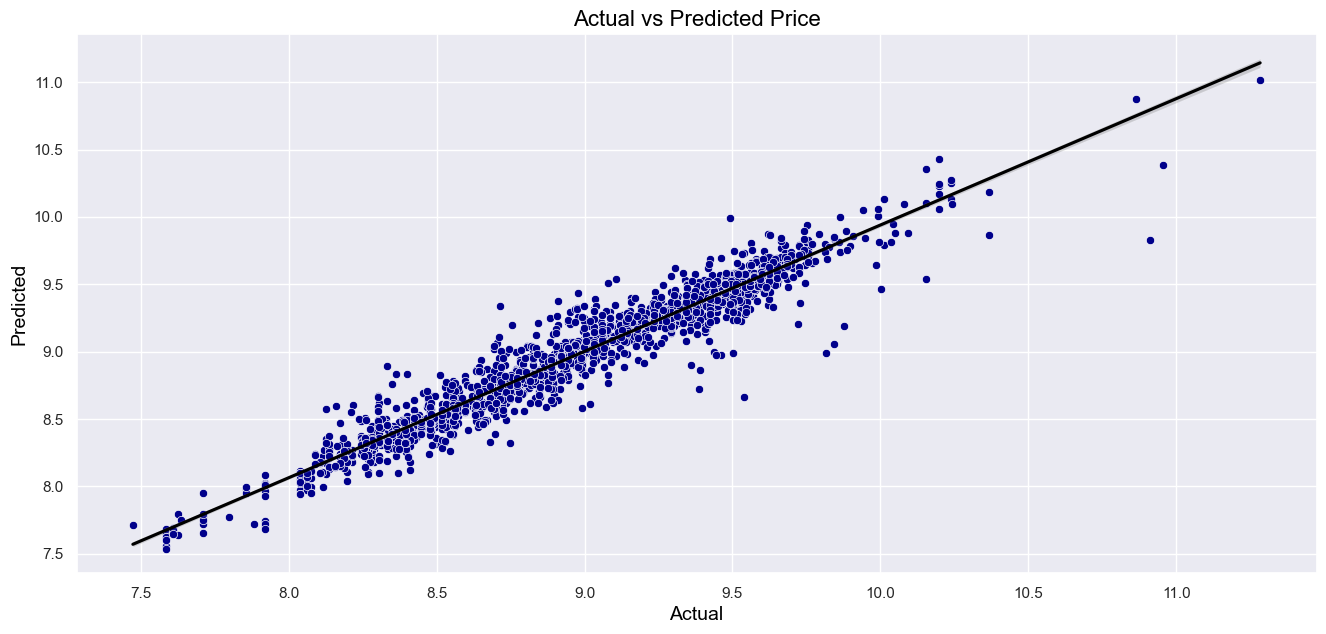

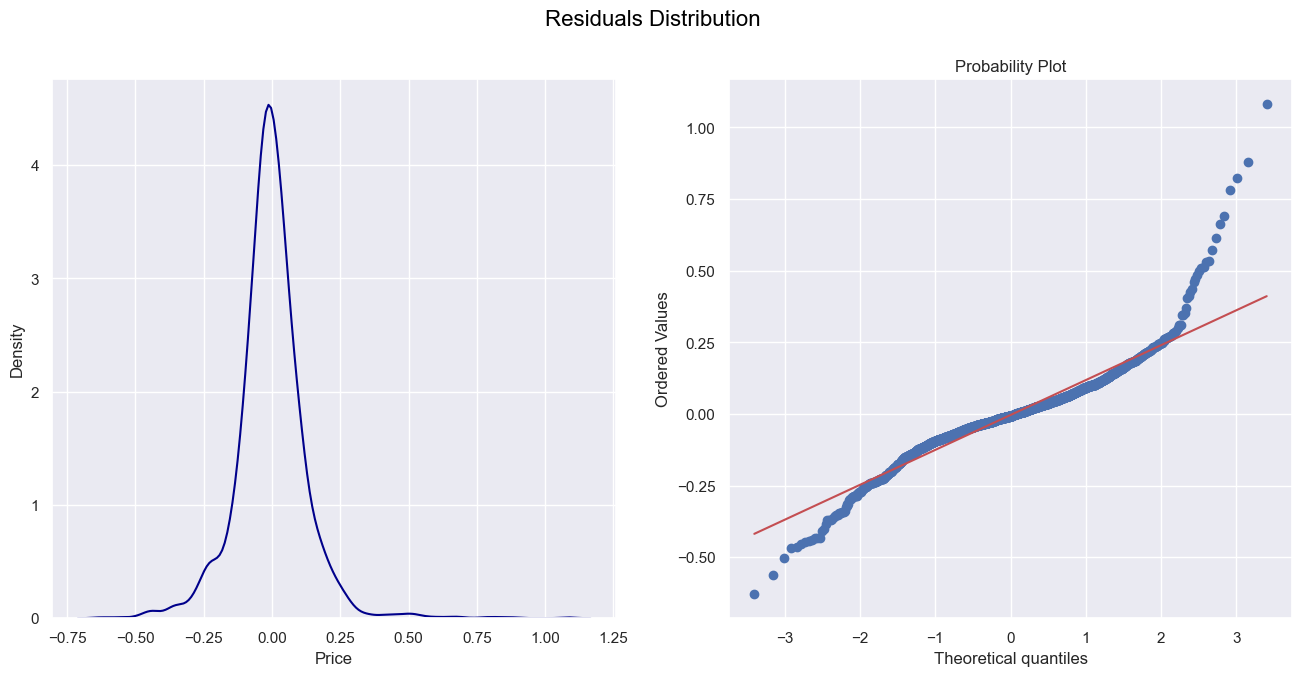

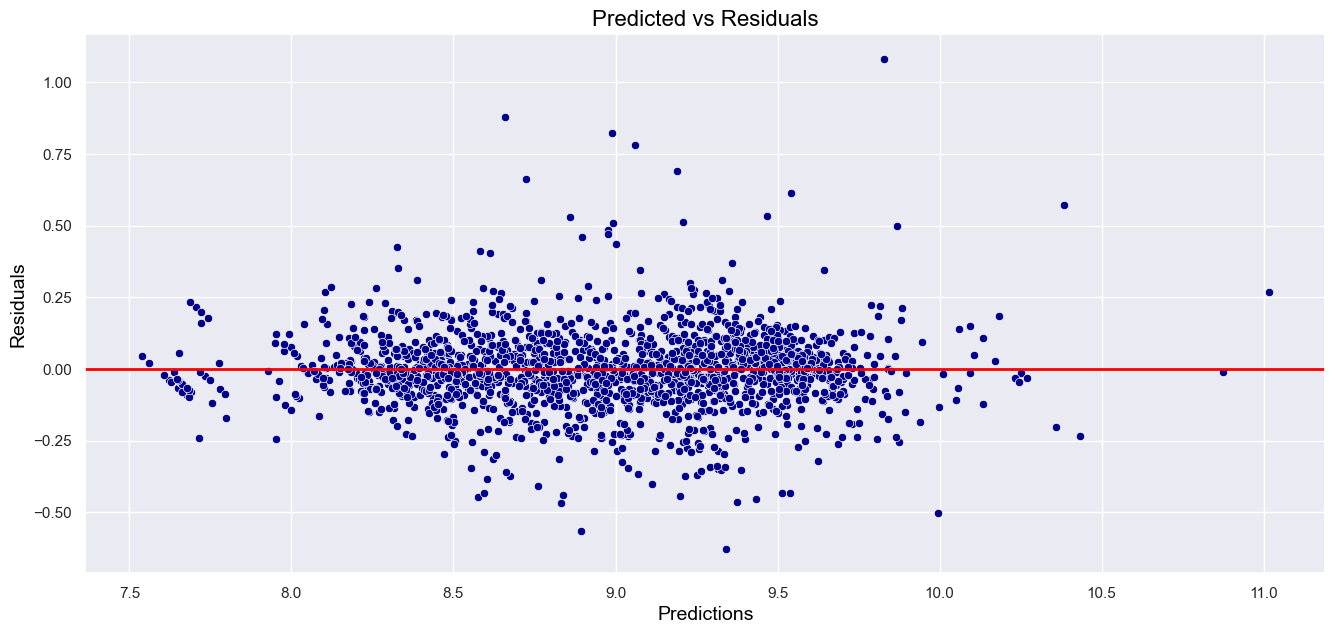

In [73]:
xgb_model, xgb_metrics = regression_model(XGBRegressor(), X_sc, y)

## Final Results

In [74]:
pd.DataFrame([lr_base_metrics, lasso_metrics, ridge_metrics, dt_metrics, rf_metrics, xgb_metrics],
             index = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
             columns = ["r2_score (train)", "r2_score (test)", "Varaince", "Adj_r2_score (train)", "Adj_r2_score (test)", "MSE", "RMSE", "MAE", "Cross_val_mse"])

r2_score (train)  r2_score (test) Varaince  \
Linear Regression                   0.758            0.753     0.5%   
Lasso Regression                    0.758            0.753     0.5%   
Ridge Regression                    0.758            0.753     0.5%   
Decision Tree Regressor             0.962            0.914     4.8%   
Random Forest Regressor             0.979            0.937     4.2%   
XGBoost Regressor                   0.970            0.940     3.0%   

                         Adj_r2_score (train)  Adj_r2_score (test)   MSE  \
Linear Regression                       0.757                0.750  0.07   
Lasso Regression                        0.757                0.750  0.07   
Ridge Regression                        0.757                0.750  0.07   
Decision Tree Regressor                 0.962                0.913  0.02   
Random Forest Regressor                 0.979                0.936  0.02   
XGBoost Regressor                       0.969                0.939  0.02   

                         RMSE   MAE  Cross_val_mse  
Linear Regression        0.26  0.07      -0.064759  
Lasso Regression         0.26  0.07      -0.064794  
Ridge Regression         0.26  0.07      -0.064759  
Decision Tree Regressor  0.14  0.02      -0.023099  
Random Forest Regressor  0.14  0.02      -0.017326  
XGBoost Regressor        0.14  0.02      -0.016370